In [1]:
##Set styling for plotting
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_palette('colorblind')
from matplotlib.pyplot import tight_layout
# ##SETTING PARAMS FOR MATPLOTLIB FIGURES
plt.rcParams.update({"figure.figsize": (6, 6),
                 "axes.facecolor": "white",
                 "axes.edgecolor": "black"})
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=sns.color_palette('colorblind'))
##set font size
font = {'family': 'sans-serif',
       'weight': 'normal',
       'size': 14}
plt.rc('font', **font)
# ##PANDAS PLOTTING
pd.plotting.register_matplotlib_converters()


In [2]:
##set file path outside git=hub repo (data must not be stpored in github)
file_path='/mnt/hgfs/shared/ihfdv2.xlsx'

##Import modules
import numpy as np
!pip install openpyxl
%matplotlib inline
##save juypter env file
!conda env export > ihfd_environment.yml

In [3]:
##Import data from excel into panda's dataframe
ihfd_df = pd.read_excel(file_path, engine='openpyxl')

In [4]:
##check first 5 lines
ihfd_df.head(5)

,Index,New Health Regions,Adm_Trauma_DateTime,NOCA_TraumaPeriodDay,Adm_First_Pres_Hosp_DateTime,NOCA_FirstPresPeriodDay,NOCA_AgeRange,LOS,Adm_Trauma_TYPE,Adm_Hospital_Fall,...,Adm_Pressure_Ulcers,Adm_Spec_Falls_Assess,Adm_Bone_Protect_Med,Adm_Multi_Rehab_Assess,Adm_AMB_Number_ACU_DIS,Adm_Discharged_To,Adm_Nut_Risk,Adm_Nerve_Block,Adm_Ass_Anp,Adm_Mobilised_No_Opt
0,1,HSE Dublin and South East,NaT,NaN,2015-09-08,PM,75-79,16,1.0,NaN,...,2.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,HSE Mid West,NaT,NaN,2015-10-24,AM,80-84,60,2.0,NaN,...,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,HSE Dublin and South East,NaT,NaN,2015-03-31,PM,95+,49,2.0,NaN,...,2.0,1.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,HSE Dublin and South East,2015-01-08,AM,2015-01-08,AM,75-79,12,2.0,NaN,...,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,HSE South West,NaT,NaN,2015-01-10,AM,65-69,12,2.0,NaN,...,2.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
##check last 5
ihfd_df.tail(5)

,Index,New Health Regions,Adm_Trauma_DateTime,NOCA_TraumaPeriodDay,Adm_First_Pres_Hosp_DateTime,NOCA_FirstPresPeriodDay,NOCA_AgeRange,LOS,Adm_Trauma_TYPE,Adm_Hospital_Fall,...,Adm_Pressure_Ulcers,Adm_Spec_Falls_Assess,Adm_Bone_Protect_Med,Adm_Multi_Rehab_Assess,Adm_AMB_Number_ACU_DIS,Adm_Discharged_To,Adm_Nut_Risk,Adm_Nerve_Block,Adm_Ass_Anp,Adm_Mobilised_No_Opt
37312,39145,HSE Dublin and North East,NaT,NaN,2023-12-14,AM,85-89,36,2.0,NaN,...,2.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,2.0,4.0
37313,39146,HSE Dublin and North East,NaT,NaN,2023-12-27,PM,85-89,19,2.0,NaN,...,2.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,2.0,3.0
37314,39153,HSE Dublin and North East,2023-12-28,AM,2023-12-28,Night,75-79,7,2.0,NaN,...,2.0,1.0,1.0,1.0,NaN,1.0,3.0,1.0,2.0,NaN
37315,39156,HSE West and North West,2023-12-26,PM,2023-12-26,PM,80-84,7,2.0,NaN,...,2.0,1.0,2.0,1.0,NaN,6.0,3.0,1.0,2.0,NaN
37316,39163,HSE West and North West,NaT,NaN,2023-12-17,AM,85-89,58,2.0,NaN,...,2.0,1.0,2.0,2.0,5.0,1.0,2.0,9.0,1.0,NaN


In [6]:
##data frame info - data types
ihfd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37317 entries, 0 to 37316
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Index                         37317 non-null  int64         
 1   New Health Regions            37317 non-null  object        
 2   Adm_Trauma_DateTime           12916 non-null  datetime64[ns]
 3   NOCA_TraumaPeriodDay          12916 non-null  object        
 4   Adm_First_Pres_Hosp_DateTime  36226 non-null  datetime64[ns]
 5   NOCA_FirstPresPeriodDay       36226 non-null  object        
 6   NOCA_AgeRange                 37317 non-null  object        
 7   LOS                           37317 non-null  int64         
 8   Adm_Trauma_TYPE               37085 non-null  float64       
 9   Adm_Hospital_Fall             2536 non-null   float64       
 10  Adm_Ward_Type                 37306 non-null  float64       
 11  Adm_Pre_Frac_Indoor         

## Initial EDA
the next cell lists all the variables we recieved initially from NOCA, the table lists all the variables the description and the count available in the dataset

$$
\begin{array}{|r|l|r|l|l|}
\hline
\text{No} & \text{Variable} & \text{Count} & \text{Label} & \text{Description} \\
\hline\hline
0 & \text{Index} & 37310 & \text{N/A} & \text{Index number for each entry} \\
\hline
1 & \text{Adm\_Trauma\_DateTime} & 12913 & \text{1. Date and time of trauma} & \text{Date and time of trauma causing hip fracture (Format: DD/MM/YYYY, HH:MM)} \\
\hline
2 & \text{NOCA\_AgeRange} & 37310 & \text{Age range} & \text{Age range of patient} \\
\hline
3 & \text{Adm\_Trauma\_TYPE} & 37078 & \text{2. Type of trauma} & \begin{array}{l} 
    1 \text{ High energy trauma} \\ 
    2 \text{ Low energy trauma} \\ 
    8 \text{ Unknown} \\ 
    9 \text{ Not documented} \end{array} \\
\hline
4 & \text{Adm\_Hospital\_Fall} & 2535 & \text{4H. Hospital fall} & \begin{array}{l}
    1 \text{ Yes} \\
    2 \text{ No} \end{array} \\
\hline
5 & \text{Adm\_Ward\_Type} & 37299 & \text{5. Ward type} & \begin{array}{l} 
    1 \text{ Orthopaedic Ward} \\ 
    2 \text{ Never Admitted to Orthopaedic Ward} \\ 
    9 \text{ Not Documented} \end{array} \\
\hline
6 & \text{Adm\_Pre\_Frac\_Indoor} & 29378 & \text{6A. Indoor mobility} & \begin{array}{l} 
    0 \text{ Unable} \\ 
    1 \text{ Assistance of one person} \\ 
    2 \text{ With an aid} \\ 
    3 \text{ Independent} \end{array} \\
\hline
7 & \text{Adm\_PRE\_Frac\_Outdoor} & 29141 & \text{6B. Outdoor mobility} & \begin{array}{l} 
    0 \text{ Unable} \\ 
    1 \text{ Assistance of one person} \\ 
    2 \text{ With an aid} \\ 
    3 \text{ Independent} \end{array} \\
\hline
8 & \text{Adm\_Pre\_Frac\_Shop} & 29037 & \text{6C. Shopping capability} & \begin{array}{l} 
    0 \text{ Unable} \\ 
    1 \text{ Assistance of one person} \\ 
    2 \text{ With an aid} \\ 
    3 \text{ Independent} \end{array} \\
\hline
9 & \text{Adm\_Pre\_Frac\_Number} & 29117 & \text{6D. Mobility Score} & \text{Pre-fracture New Mobility Score (Sum A+B+C)} \\
\hline
10 & \text{Adm\_Fracture\_Type} & 37123 & \text{8A. Fracture type} & \begin{array}{l} 
    1 \text{ Intracapsular - displaced} \\ 
    2 \text{ Intracapsular - undisplaced} \\ 
    3 \text{ Intertrochanteric} \\ 
    4 \text{ Subtrochanteric} \\ 
    5 \text{ Periprosthetic} \\ 
    8 \text{ Other} \\ 
    9 \text{ Not documented} \end{array} \\
\hline
11 & \text{Adm\_FRACTURE\_Type\_Other2} & 2 & \text{8B. Fracture type other} & \text{Type of fracture (Other, please specify)} \\
\hline
12 & \text{Adm\_Pathological} & 36419 & \text{9. Pathological fracture} & \begin{array}{l} 
    1 \text{ Atypical} \\ 
    2 \text{ Malignancy} \\ 
    3 \text{ No} \\ 
    9 \text{ Not documented} \end{array} \\
\hline
13 & \text{Adm\_Fragility} & 36692 & \text{10. Fragility fractures} & \begin{array}{l} 
    1 \text{ Yes} \\ 
    2 \text{ No} \\ 
    9 \text{ Not documented} \end{array} \\
\hline
14 & \text{Adm\_Pre\_OP\_Med\_Assess} & 37157 & \text{11. Pre-op medical assessment} & \begin{array}{l} 
    1 \text{ Routine by geriatrician} \\ 
    2 \text{ Routine by medical physician} \\ 
    6 \text{ None} \\ 
    7 \text{ Ger review following request} \\ 
    8 \text{ Med physician review following request} \\ 
    9 \text{ Not documented} \end{array} \\
\hline
15 & \text{Adm\_Ger\_Acute\_Assess} & 35313 & \text{11A. Geriatric assessment} & \begin{array}{l} 
    1 \text{ Yes} \\ 
    2 \text{ No} \\ 
    3 \text{ Not applicable} \\ 
    9 \text{ Not documented} \end{array} \\
\hline
16 & \text{Adm\_Operation} & 37222 & \text{14. Operation} & \begin{array}{l} 
    00 \text{ No operation performed} \\ 
    01 \text{ Internal fixation DHS} \\ 
    02 \text{ Internal fixation Screws} \\ 
    03 \text{ IM nail long} \\ 
    04 \text{ IM nail short} \\ 
    05 \text{ Art hemi uncemented} \\ 
    06 \text{ Art hemi cemented} \\ 
    07 \text{ Art total hip replacement} \\ 
    99 \text{ Not documented} \end{array} \\
\hline
17 & \text{Adm\_Asa\_Grade} & 35451 & \text{14A. ASA Grade} & \begin{array}{l} 
    1 \text{ Normal healthy individual} \\ 
    2 \text{ Mild systemic disease} \\ 
    3 \text{ Severe systemic disease} \\ 
    4 \text{ Incapacitating disease} \\ 
    5 \text{ Moribund, not expected to survive} \\ 
    9 \text{ Not documented} \end{array} \\
\hline
18 & \text{Adm\_Anaesthesia} & 35382 & \text{14B. Anaesthesia type} & \begin{array}{l} 
    1 \text{ GA only} \\ 
    2 \text{ GA + nerve block} \\ 
    3 \text{ GA + spinal anaesthesia} \\ 
    4 \text{ GA + epidural anaesthesia} \\ 
    5 \text{ SA only} \\ 
    6 \text{ SA + nerve block} \\ 
    7 \text{ SA + epidural (CSE)} \\ 
    8 \text{ Other} \\ 
    9 \text{ Not documented} \end{array} \\
\hline
19 & \text{Adm\_Primary\_Surgery\_DateTime} & 35575 & \text{14E. Surgery Date/Time} & \text{Date and time of primary surgery (Format: DD/MM/YYYY, HH:MM)} \\
\hline
20 & \text{Adm\_Surgery\_Delay\_Reason} & 35372 & \text{14H. Surgery delay reason} & \begin{array}{l} 
    0 \text{ No delay - surgery < 48 hours} \\ 
    1 \text{ Awaiting orthopaedic diagnosis} \\ 
    2 \text{ Awaiting medical review or stabilisation} \\ 
    3 \text{ Awaiting inpatient or high dependency bed} \\ 
    4 \text{ Awaiting space on theatre list} \\ 
    5 \text{ Problem with theatre/equipment} \\ 
    6 \text{ Problem with surgical staff cover} \\ 
    7 \text{ Cancelled due to list over-run} \\ 
    8 \text{ Other} \\ 
    9 \text{ Not documented} \end{array} \\
\hline
21 & \text{Adm\_Mobilised} & 33741 & \text{14J. Mobilised post-surgery} & \begin{array}{l} 
    1 \text{ Yes} \\ 
    2 \text{ No} \\ 
    9 \text{ Not documented} \end{array} \\
\hline
22 & \text{Adm\_RE\_OP\_30\_DAYS} & 33094 & \text{14M. Re-operation within 30 days} & \begin{array}{l} 
    0 \text{ None} \\ 
    1 \text{ Reduction of dislocated prosthesis} \\ 
    2 \text{ Washout or debridement} \\ 
    3 \text{ Implant removal} \\ 
    4 \text{ Revision of internal fixation} \\ 
    5 \text{ Conversion to Hemiarthroplasty} \\ 
    6 \text{ Conversion to THR} \\ 
    7 \text{ Girdlestone/excision arthroplasty} \\ 
    8 \text{ Surgery for periprosthetic fracture} \\ 
    9 \text{ Not documented} \end{array} \\
\hline
23 & \text{Adm\_Pressure\_Ulcers} & 36904 & \text{16. Pressure ulcers} & \begin{array}{l} 
    1 \text{ Yes} \\ 
    2 \text{ No} \\ 
    9 \text{ Not documented} \end{array} \\
\hline
24 & \text{Adm\_Spec\_Falls\_Assess} & 36886 & \text{17. Falls assessment} & \begin{array}{l} 
    0 \text{ No} \\ 
    1 \text{ Yes - performed on this admission} \\ 
    2 \text{ Yes - awaits out-patient assessment} \\ 
    3 \text{ Not applicable} \end{array} \\
\hline
25 & \text{Adm\_Bone\_Protect\_Med} & 36614 & \text{18. Bone protection medication} & \begin{array}{l} 
    0 \text{ No assessment} \\ 
    1 \text{ Started on this admission} \\ 
    2 \text{ Continued from pre-admission} \\ 
    3 \text{ Awaits DXA scan} \\ 
    4 \text{ Awaits out-patient assessment} \\ 
    5 \text{ No medication needed} \\ 
    6 \text{ Not applicable} \end{array} \\
\hline
26 & \text{Adm\_Multi\_Rehab\_Assess} & 36796 & \text{19. Multidisciplinary rehab} & \begin{array}{l} 
    1 \text{ Yes} \\ 
    2 \text{ No} \\ 
    9 \text{ Not documented} \end{array} \\
\hline
27 & \text{Adm\_AMB\_Number\_ACU\_DIS} & 13956 & \text{20. Ambulatory Score acute discharge} & \text{Cumulative Ambulatory Score – acute discharge (0 - 6)} \\
\hline
28 & \text{Adm\_Discharged\_To} & 25994 & \text{21. Discharge destination} & \begin{array}{l} 
    1 \text{ Home} \\ 
    2 \text{ On-site rehab unit} \\ 
    3 \text{ Off-site rehab unit} \\ 
    4 \text{ Convalescence care} \\ 
    5 \text{ New adm to nursing home} \\ 
    6 \text{ Return adm to nursing home} \\ 
    7 \text{ Died} \\ 
    8 \text{ Other} \end{array} \\
\hline
29 & \text{Adm\_Nut\_Risk} & 18788 & \text{12. Nutritional risk assessment} & \begin{array}{l} 
    0 \text{ No} \\ 
    1 \text{ Indicates malnourished} \\ 
    2 \text{ Indicates risk of malnutrition} \\ 
    3 \text{ Indicates normal} \end{array} \\
\hline
30 & \text{Adm\_Nerve\_Block} & 19231 & \text{13. Nerve block administered} & \begin{array}{l} 
    1 \text{ Yes} \\ 
    2 \text{ No} \\ 
    9 \text{ Not documented} \end{array} \\
\hline
31 & \text{Adm\_Ass\_Anp} & 15730 & \text{11E. ANP/cANP assessment} & \begin{array}{l} 
    1 \text{ Yes} \\ 
    2 \text{ No} \\ 
    3 \text{ Not applicable} \\ 
    9 \text{ Not documented} \end{array} \\
\hline
32 & \text{Adm\_Mobilised\_No\_Opt} & 2156 & \text{14J3. Reason for not mobilised} & \begin{array}{l} 
    1 \text{ Pain} \\ 
    2 \text{ Confusion/agitation/delirium} \\ 
    3 \text{ Patient declined} \\ 
    4 \text{ Medically not fit} \\ 
    5 \text{ Not mobile pre-fracture} \\ 
    6 \text{ Physio staffing issues} \\ 
    7 \text{ Other staffing} \\ 
    8 \text{ Other} \\ 
    9 \text{ Not documented} \end{array} \\
\hline
\end{array}
$$


 

$$
\begin{array}{|l|p{7cm}|p{5cm}|}
\hline
\textbf{Type of Hip Fracture} & \textbf{Description} & \textbf{Severity} \\
\hline
\text{Intracapsular - Displaced} & \text{Intracapsular fractures occur within the capsule of the hip joint, affecting the femoral neck, the narrow section of the femur just below the ball of the hip joint.} & \text{Displaced intracapsular fractures are severe as the broken bone ends have moved out of alignment, disrupting blood flow to the femoral head. This often requires hip replacement or fixation surgery due to the risk of avascular necrosis.} \\
\hline
\text{Intracapsular - Undisplaced} & \text{An undisplaced intracapsular fracture occurs in the femoral neck, but the bone has not shifted, reducing the risk of compromised blood supply.} & \text{These fractures have a better prognosis and may be treated with internal fixation (e.g., screws) rather than hip replacement, especially in younger patients.} \\
\hline
\text{Intertrochanteric} & \text{Fractures occurring between the greater and lesser trochanters, the bony prominences below the femoral neck, located outside the joint capsule.} & \text{Generally treated with fixation devices, like plates and screws. These fractures maintain blood flow to the femoral head but still present significant pain and mobility issues, especially in older adults.} \\
\hline
\text{Subtrochanteric} & \text{Occurs just below the lesser trochanter, in the upper part of the femoral shaft, often extending down the femur.} & \text{Requires surgical intervention (e.g., intramedullary nails or rods) due to high forces in this area. Healing may be prolonged, particularly in older patients or those with weaker bones.} \\
\hline
\text{Periprosthetic} & \text{Fracture occurs around a hip prosthesis (artificial joint from prior replacement), either above, below, or around the prosthesis area.} & \text{Treatment complexity varies based on fracture and implant stability. May require revision surgery, posing challenges for older or less healthy individuals.} \\
\hline
\end{array}
$$


In [7]:
##stats
ihfd_df.describe()

,Index,Adm_Trauma_DateTime,Adm_First_Pres_Hosp_DateTime,LOS,Adm_Trauma_TYPE,Adm_Hospital_Fall,Adm_Ward_Type,Adm_Pre_Frac_Indoor,Adm_PRE_Frac_Outdoor,Adm_Pre_Frac_Shop,...,Adm_Pressure_Ulcers,Adm_Spec_Falls_Assess,Adm_Bone_Protect_Med,Adm_Multi_Rehab_Assess,Adm_AMB_Number_ACU_DIS,Adm_Discharged_To,Adm_Nut_Risk,Adm_Nerve_Block,Adm_Ass_Anp,Adm_Mobilised_No_Opt
count,37317.000000,12916,36226,37317.000000,37085.000000,2536.000000,37306.000000,29384.000000,29147.000000,29043.000000,...,36911.000000,36893.000000,36621.000000,36803.000000,13959.000000,26001.000000,18795.000000,19238.000000,15737.000000,2158.000000
mean,18744.459388,2018-12-18 16:34:29.247445248,2019-01-20 16:53:33.426820608,19.099204,2.132884,1.772082,1.102638,2.072659,1.785570,1.403402,...,2.008940,0.721031,1.613145,1.098362,3.753206,3.688089,1.704389,1.747531,2.057381,4.334569
min,1.000000,2013-01-01 00:00:00,2007-05-04 00:00:00,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,9422.000000,2016-11-09 18:00:00,2016-08-09 00:00:00,8.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,...,2.000000,0.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,2.000000,3.000000
50%,18762.000000,2018-12-16 00:00:00,2019-03-21 00:00:00,12.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,1.000000,2.000000,4.000000
75%,28091.000000,2021-05-03 06:00:00,2021-09-11 00:00:00,21.000000,2.000000,2.000000,1.000000,3.000000,3.000000,3.000000,...,2.000000,1.000000,2.000000,1.000000,5.000000,6.000000,3.000000,2.000000,2.000000,6.000000
max,39163.000000,2023-12-31 00:00:00,2024-01-19 00:00:00,1227.000000,9.000000,2.000000,9.000000,3.000000,3.000000,3.000000,...,9.000000,3.000000,6.000000,9.000000,36.000000,8.000000,3.000000,9.000000,9.000000,9.000000
std,10815.528469,NaN,NaN,25.704303,1.006654,0.419572,0.473504,1.095977,1.205528,1.332733,...,0.592124,0.492403,1.425833,0.510525,1.697304,2.271448,1.367651,1.966063,1.426989,2.268533


In [40]:
##check missing data
ihfd_df.isna().sum()

Index                               0
New Health Regions                  0
Adm_Trauma_DateTime             24401
NOCA_TraumaPeriodDay            24401
Adm_First_Pres_Hosp_DateTime       78
NOCA_FirstPresPeriodDay          1091
NOCA_AgeRange                       0
LOS                                 0
Adm_Trauma_TYPE                   232
Adm_Hospital_Fall               34781
Adm_Ward_Type                      11
Adm_Pre_Frac_Indoor              7933
Adm_PRE_Frac_Outdoor             8170
Adm_Pre_Frac_Shop                8274
Adm_Pre_Frac_Number              8194
Adm_Fracture_Type                 187
Adm_FRACTURE_Type_Other2        37315
Adm_Pathological                  891
Adm_Fragility                     619
Adm_Pre_OP_Med_Assess             153
Adm_Ger_Acute_Assess             1997
Adm_Operation                      88
Adm_Asa_Grade                    1859
Adm_Anaesthesia                  1928
Adm_Primary_Surgery_DateTime     1735
Adm_Surgery_Delay_Reason         1938
Adm_Mobilise

In [38]:
###so the date-time is important for using with the weather data for the pres_hosp_datetime and missing values i'm going to populate with a random time 12 to 48 hours prior based on the variable surgey datetime
ihfd_df['Adm_First_Pres_Hosp_DateTime'] = ihfd_df['Adm_First_Pres_Hosp_DateTime'].fillna(
    ihfd_df['Adm_Primary_Surgery_DateTime'].apply(
        lambda x: x - pd.Timedelta(hours=np.random.uniform(12, 48)) if pd.notna(x) else np.nan
    )
)


In [39]:
##get percentage of missing data
(ihfd_df.isna().sum()/ihfd_df.shape[0] * 100).sort_values()

##a lot of missing data for some variables, ** review data dictionary to see what they are for 

Index                            0.000000
New Health Regions               0.000000
NOCA_AgeRange                    0.000000
LOS                              0.000000
Adm_Ward_Type                    0.029477
Adm_First_Pres_Hosp_DateTime     0.209020
Adm_Operation                    0.235817
Adm_Pre_OP_Med_Assess            0.410001
Adm_Fracture_Type                0.501112
Adm_Trauma_TYPE                  0.621701
Adm_Pressure_Ulcers              1.087976
Adm_Spec_Falls_Assess            1.136211
Adm_Multi_Rehab_Assess           1.377388
Adm_Fragility                    1.658761
Adm_Bone_Protect_Med             1.865102
Adm_Pathological                 2.387652
NOCA_FirstPresPeriodDay          2.923601
Adm_Primary_Surgery_DateTime     4.649356
Adm_Asa_Grade                    4.981644
Adm_Anaesthesia                  5.166546
Adm_Surgery_Delay_Reason         5.193344
Adm_Ger_Acute_Assess             5.351448
Adm_Mobilised                    9.564006
Adm_RE_OP_30_DAYS               11

In [10]:
##just for EDA drop some of the higher % missing data columns 

columns_to_drop = [
    'Adm_RE_OP_30_DAYS',
    'Adm_Pre_Frac_Indoor',
    'Adm_PRE_Frac_Outdoor',
    'Adm_Pre_Frac_Shop',
    'Adm_Discharged_To',
    'Adm_Nerve_Block',
    'Adm_Nut_Risk',
    'Adm_Ass_Anp',
    'Adm_AMB_Number_ACU_DIS',
    'Adm_Trauma_DateTime',
    'Adm_Hospital_Fall',
    'Adm_Mobilised_No_Opt',
    'Adm_FRACTURE_Type_Other2',
    'Adm_Primary_Surgery_DateTime',
    'Index'
]

# Drop the columns
ihfd_red_df = ihfd_df.drop(columns=columns_to_drop)

# Separate numeric and categorical columns
numeric_cols = ihfd_red_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = ihfd_red_df.select_dtypes(include=['object', 'category']).columns

# Fill numeric columns with mean
ihfd_red_df[numeric_cols] = ihfd_red_df[numeric_cols].fillna(ihfd_red_df[numeric_cols].median())

# Fill categorical columns with mode (most frequent value)
for col in categorical_cols:
    ihfd_red_df[col] = ihfd_red_df[col].fillna(ihfd_red_df[col].mode().iloc[0])

print(numeric_cols)
print(categorical_cols)




Index(['LOS', 'Adm_Trauma_TYPE', 'Adm_Ward_Type', 'Adm_Pre_Frac_Number',
       'Adm_Fracture_Type', 'Adm_Pathological', 'Adm_Fragility',
       'Adm_Pre_OP_Med_Assess', 'Adm_Ger_Acute_Assess', 'Adm_Operation',
       'Adm_Asa_Grade', 'Adm_Anaesthesia', 'Adm_Surgery_Delay_Reason',
       'Adm_Mobilised', 'Adm_Pressure_Ulcers', 'Adm_Spec_Falls_Assess',
       'Adm_Bone_Protect_Med', 'Adm_Multi_Rehab_Assess'],
      dtype='object')
Index(['New Health Regions', 'NOCA_TraumaPeriodDay', 'NOCA_FirstPresPeriodDay',
       'NOCA_AgeRange'],
      dtype='object')


In [11]:
ihfd_red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37317 entries, 0 to 37316
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   New Health Regions            37317 non-null  object        
 1   NOCA_TraumaPeriodDay          37317 non-null  object        
 2   Adm_First_Pres_Hosp_DateTime  36226 non-null  datetime64[ns]
 3   NOCA_FirstPresPeriodDay       37317 non-null  object        
 4   NOCA_AgeRange                 37317 non-null  object        
 5   LOS                           37317 non-null  int64         
 6   Adm_Trauma_TYPE               37317 non-null  float64       
 7   Adm_Ward_Type                 37317 non-null  float64       
 8   Adm_Pre_Frac_Number           37317 non-null  float64       
 9   Adm_Fracture_Type             37317 non-null  float64       
 10  Adm_Pathological              37317 non-null  float64       
 11  Adm_Fragility               

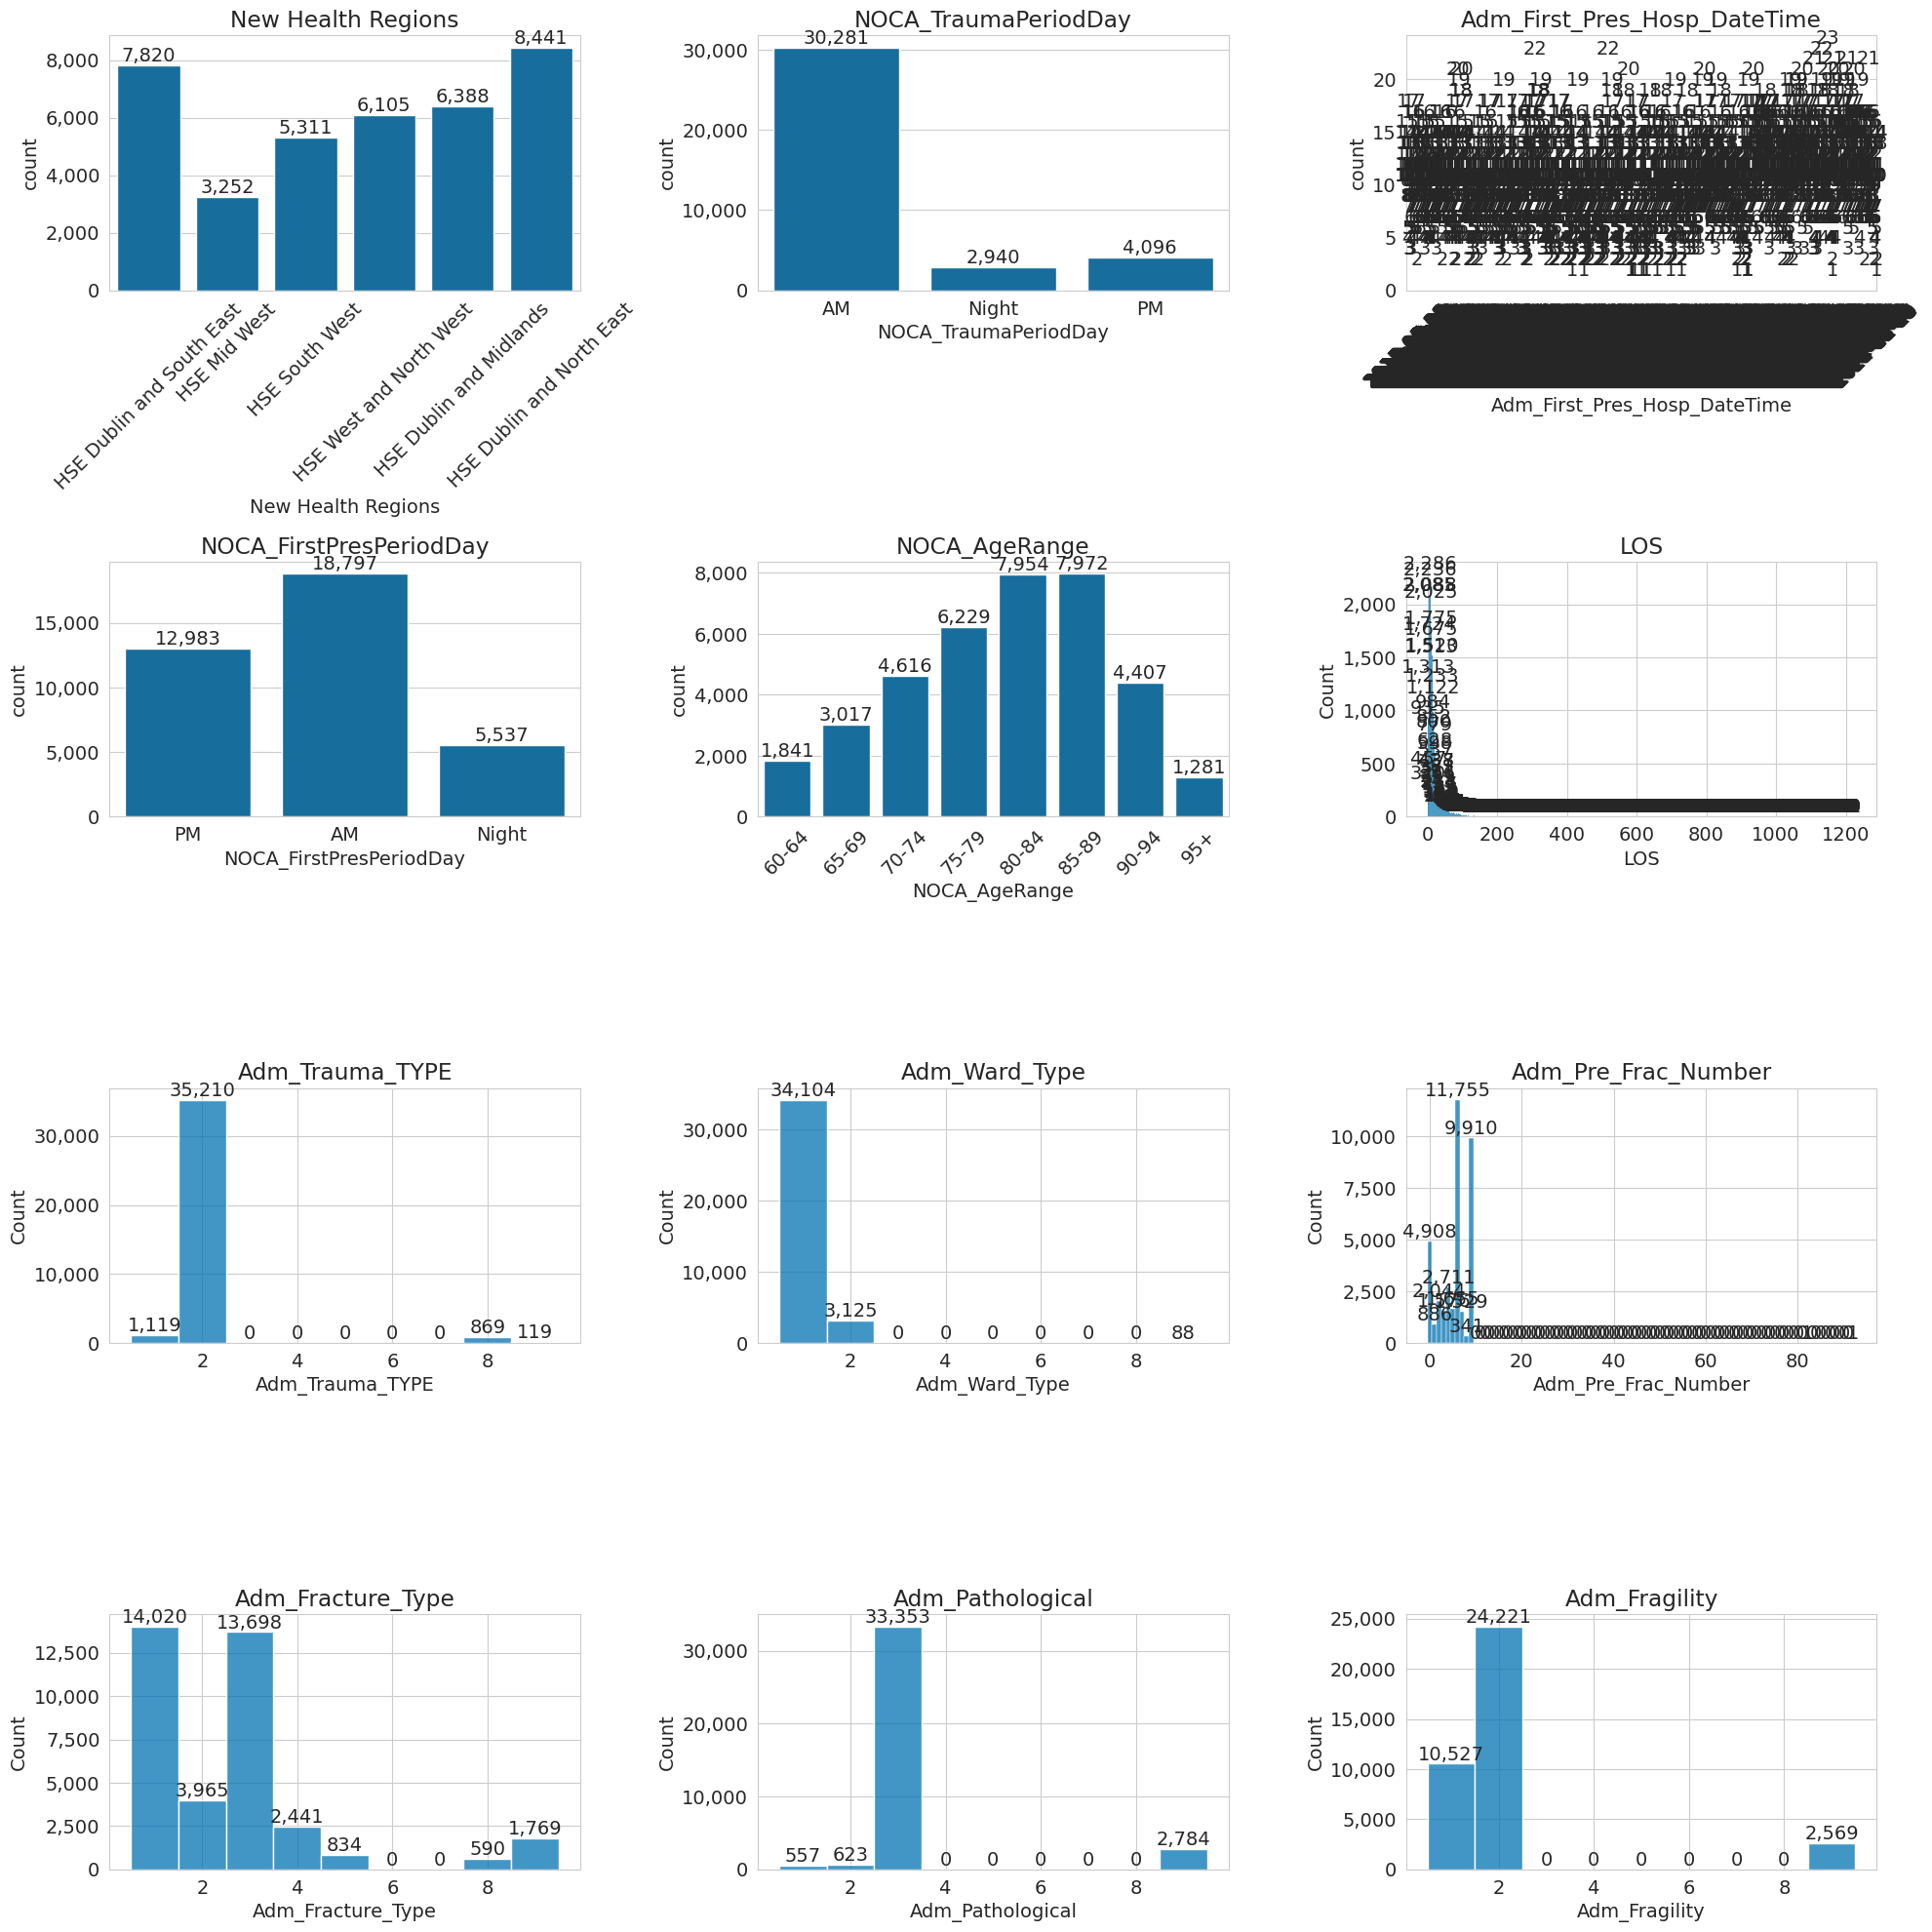

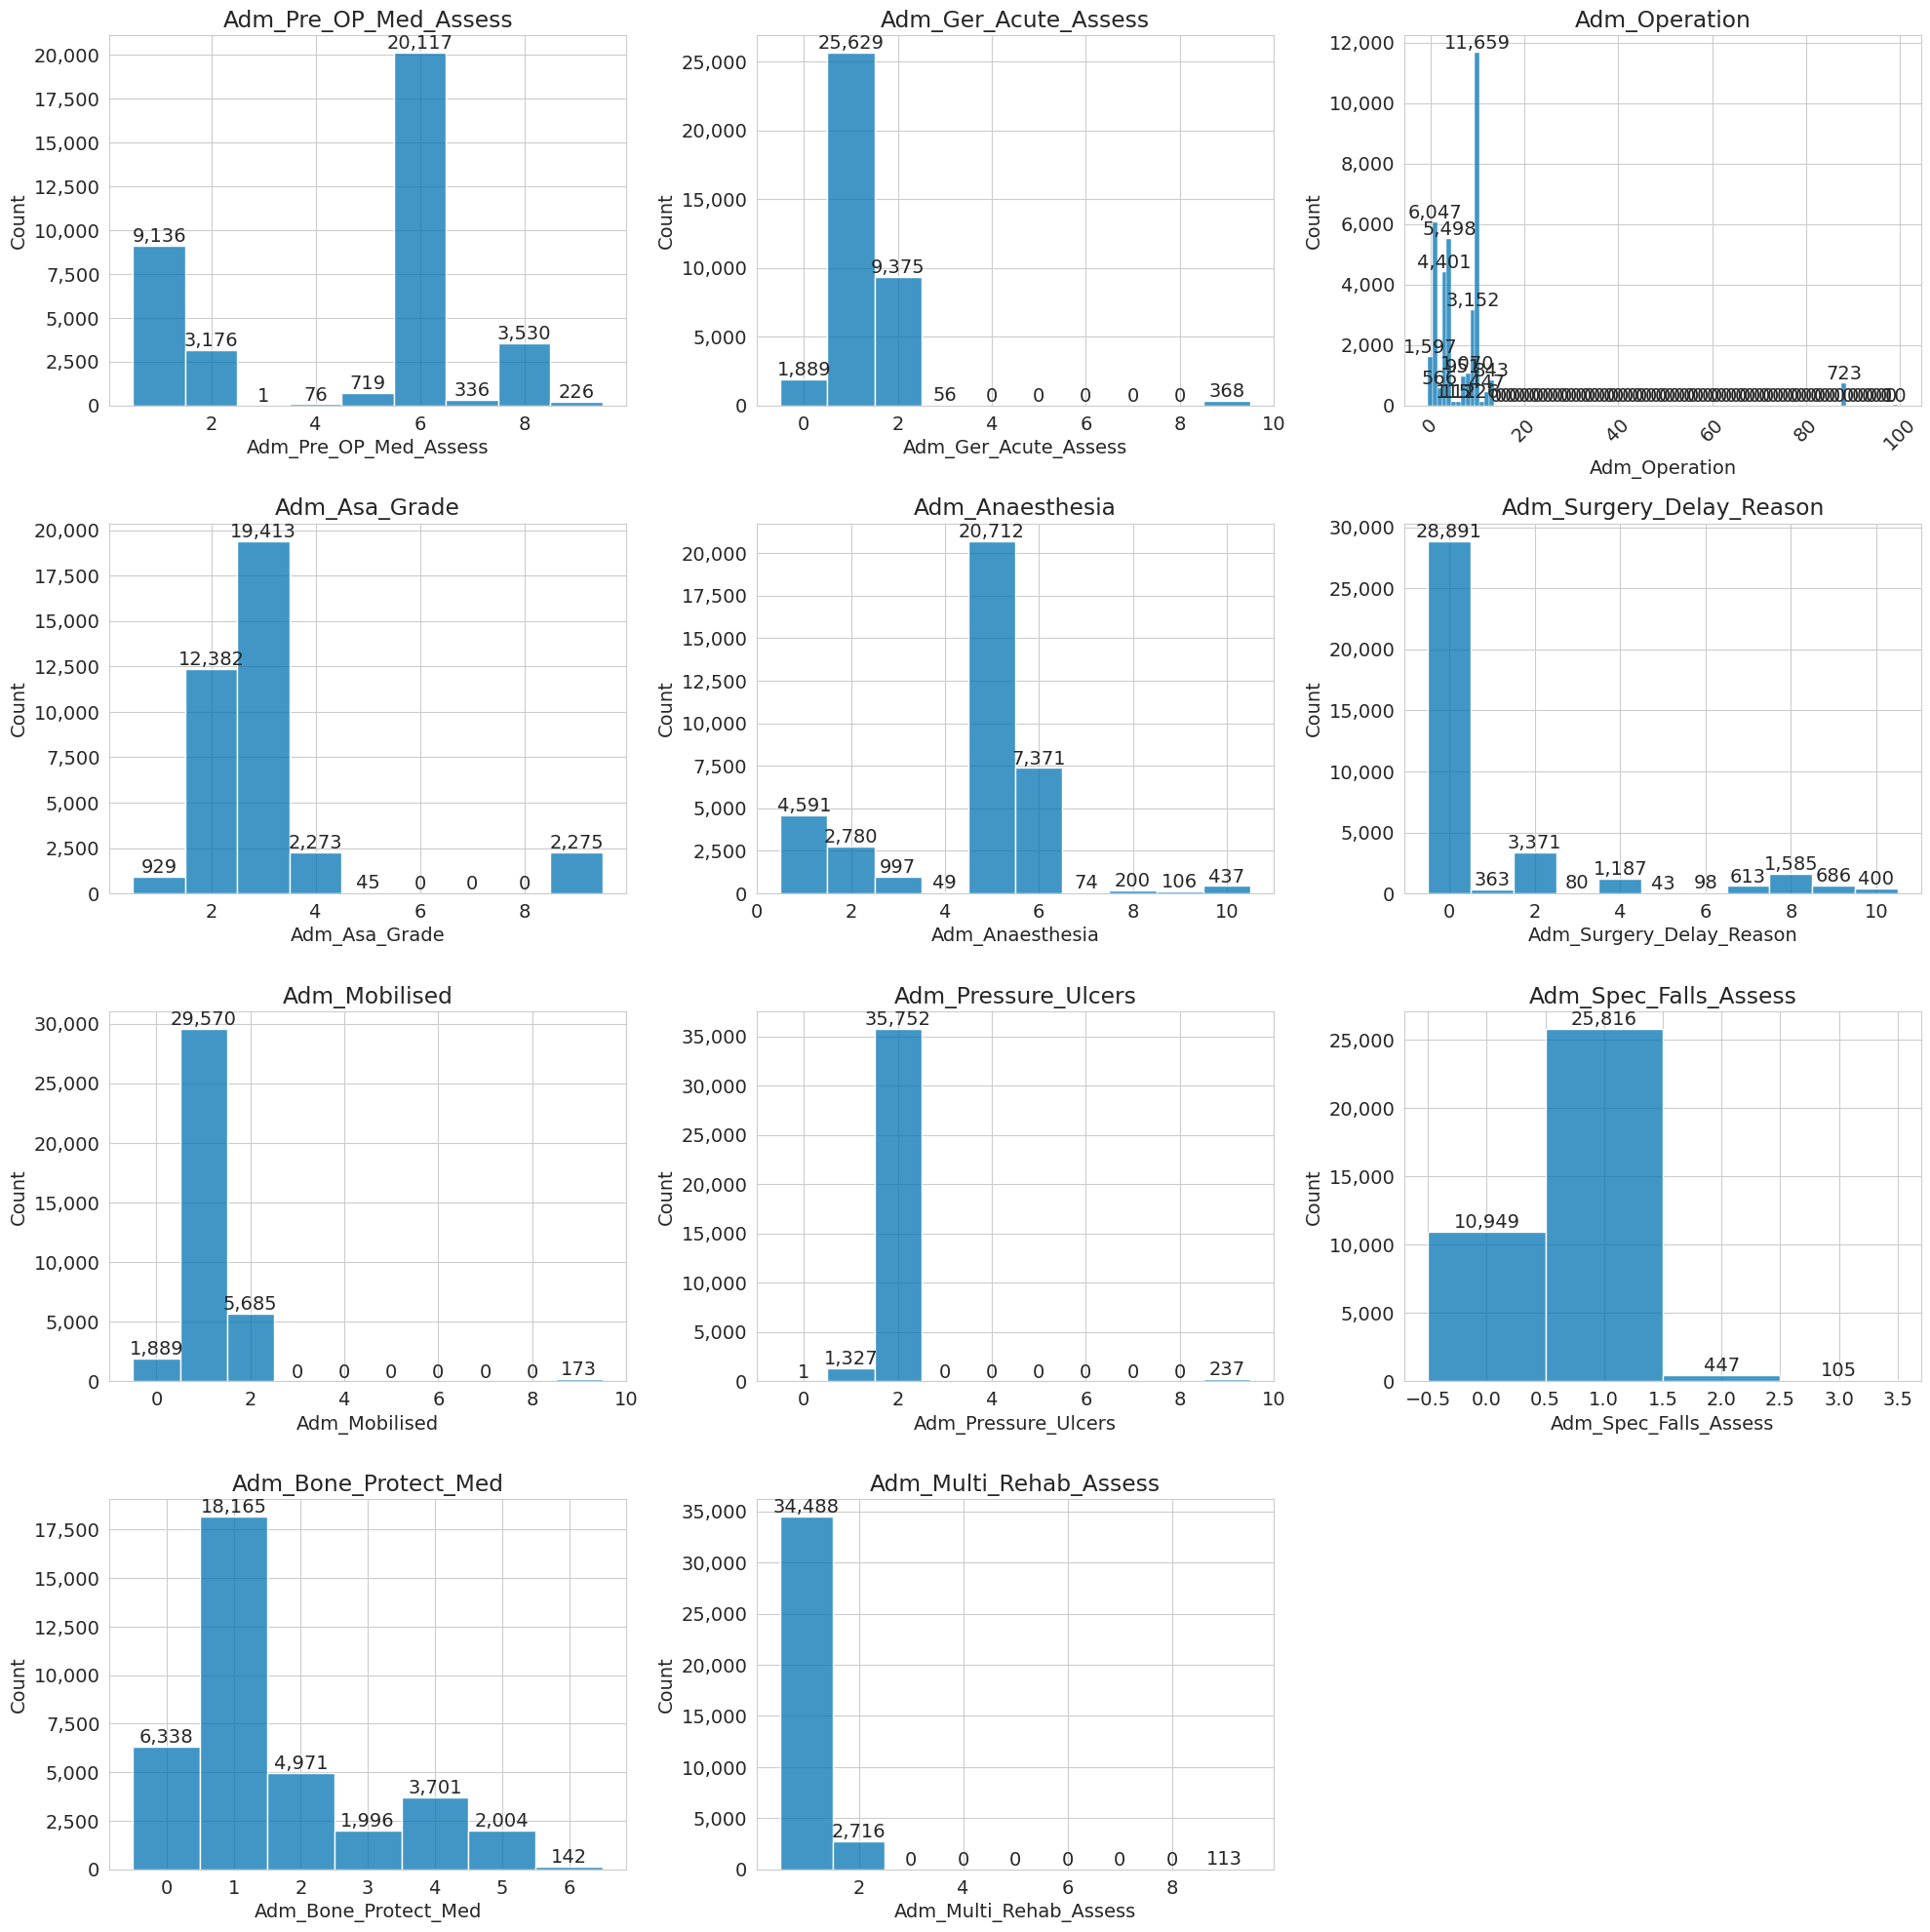

In [12]:
# Set the style for all plots
sns.set_style("whitegrid")

## cret plot based on the number of labels and specific section to make sure age group is displayed correctly 
def plot_column(data, column):
    if column == 'NOCA_AgeRange':
        age_order = ['60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95+']
        ax = sns.countplot(data=data, x=column, order=age_order)
    else:
        unique_vals = sorted(data[column].unique())
        if isinstance(unique_vals[0], (int, float, np.integer, np.floating)):
            ax = sns.histplot(data=data, x=column, discrete=True)
        else:
            ax = sns.countplot(data=data, x=column)
    
    # Rotate labels if needed
    if len(str(data[column].iloc[0])) > 3:
        plt.xticks(rotation=45)
    
    # Add value labels
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height()):,}',
                   (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='bottom')
    
    # Format y-axis
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    plt.title(column)

# get number of rows and columns needed
n_cols = 3
n_rows = (len(ihfd_red_df.columns) + n_cols - 1) // n_cols

# Create a figure for each set of 12 columns
for i in range(0, len(ihfd_red_df.columns), 12):
    columns_subset = ihfd_red_df.columns[i:i+12]
    fig = plt.figure(figsize=(20, 20))
    for idx, col in enumerate(columns_subset, 1):
        plt.subplot(4, 3, idx)
        plot_column(ihfd_red_df, col)
    
    plt.tight_layout(pad=1.0)
    plt.show()

<Axes: >

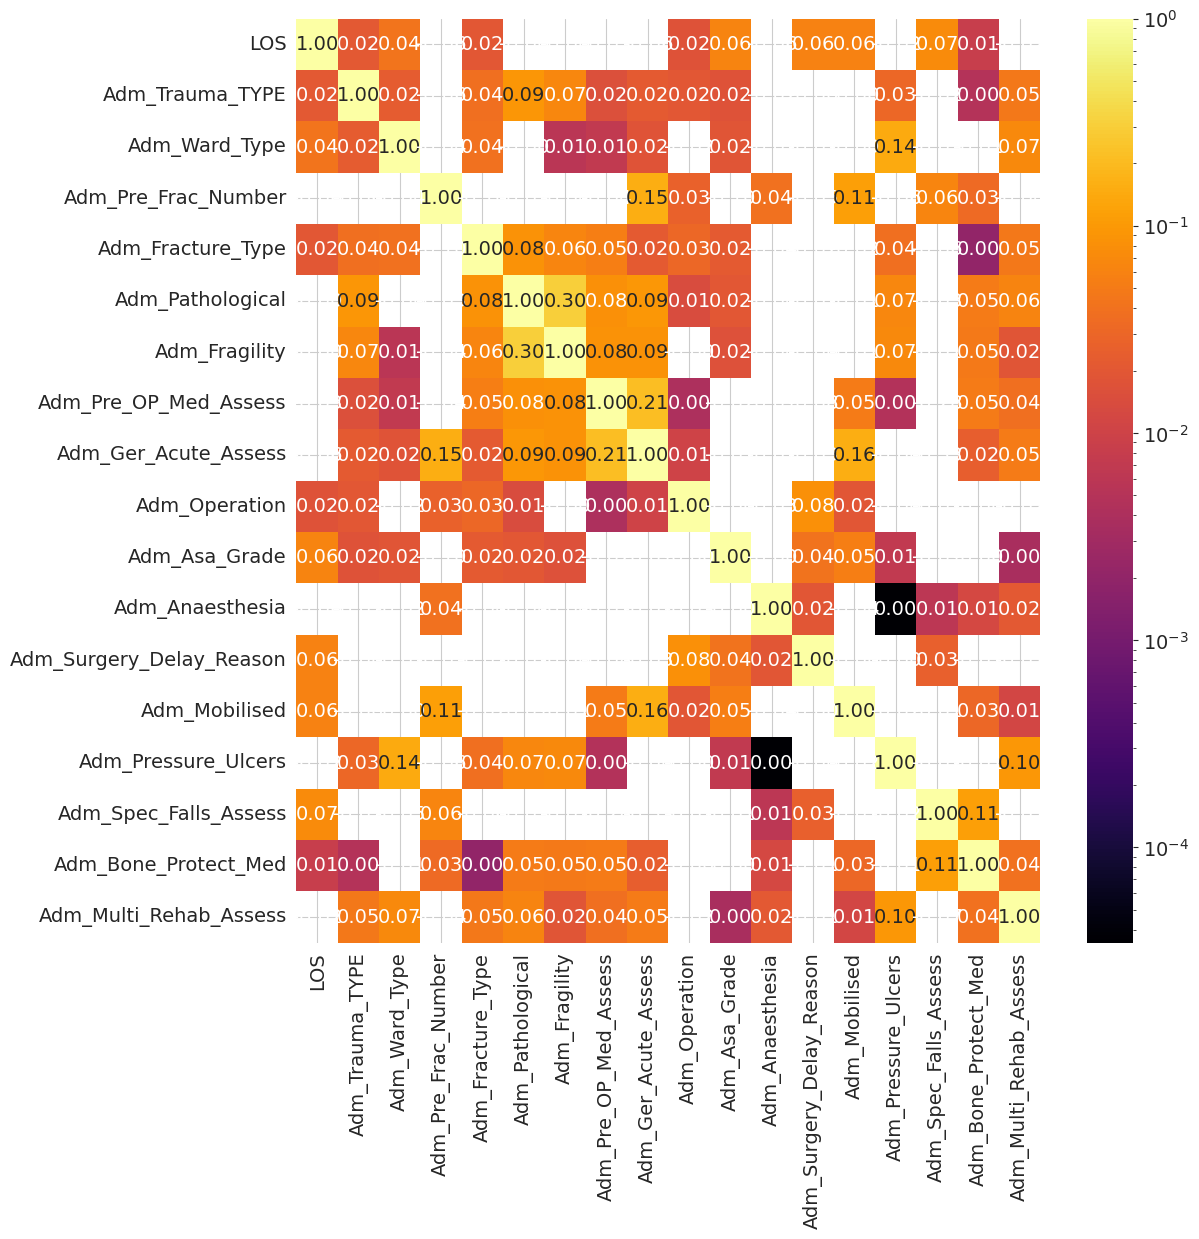

In [13]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(12, 12))
sns.heatmap(ihfd_red_df.corr(method='pearson', numeric_only=True),
            annot=True,
            cmap='inferno',
            fmt='.2f',
            norm=LogNorm())

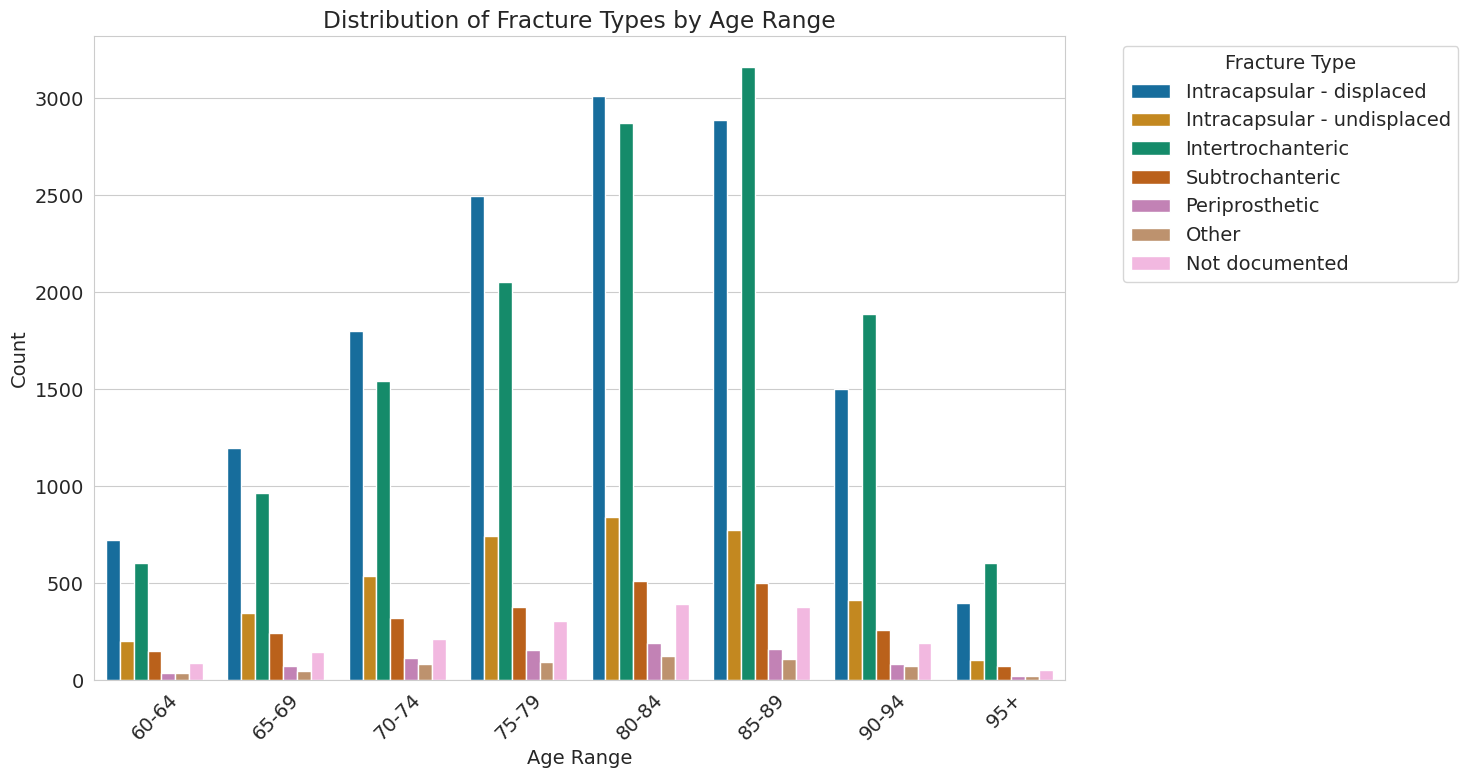


Distribution of Fracture Types:
Fracture_Type_Name
Intracapsular - displaced      14020
Intertrochanteric              13698
Intracapsular - undisplaced     3965
Subtrochanteric                 2441
Not documented                  1769
Periprosthetic                   834
Other                            590
Name: count, dtype: int64


In [14]:
## Plot the fracture type by age group
fracture_type_map = {
    1: 'Intracapsular - displaced',
    2: 'Intracapsular - undisplaced',
    3: 'Intertrochanteric',
    4: 'Subtrochanteric',
    5: 'Periprosthetic',
    8: 'Other',
    9: 'Not documented'
}

# column with mapped values
ihfd_red_df['Fracture_Type_Name'] = ihfd_red_df['Adm_Fracture_Type'].map(fracture_type_map)

# Create the plot with the descriptive names
plt.figure(figsize=(15, 8))
sns.countplot(data=ihfd_red_df, 
              x='NOCA_AgeRange', 
              hue='Fracture_Type_Name',
              hue_order=[fracture_type_map[i] for i in sorted(fracture_type_map.keys())],  
              order=sorted(ihfd_red_df['NOCA_AgeRange'].unique()))

plt.xticks(rotation=45)
plt.title('Distribution of Fracture Types by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.legend(title='Fracture Type', 
          bbox_to_anchor=(1.05, 1), 
          loc='upper left')
plt.tight_layout()
plt.show()

print("\nDistribution of Fracture Types:")
print(ihfd_red_df['Fracture_Type_Name'].value_counts())

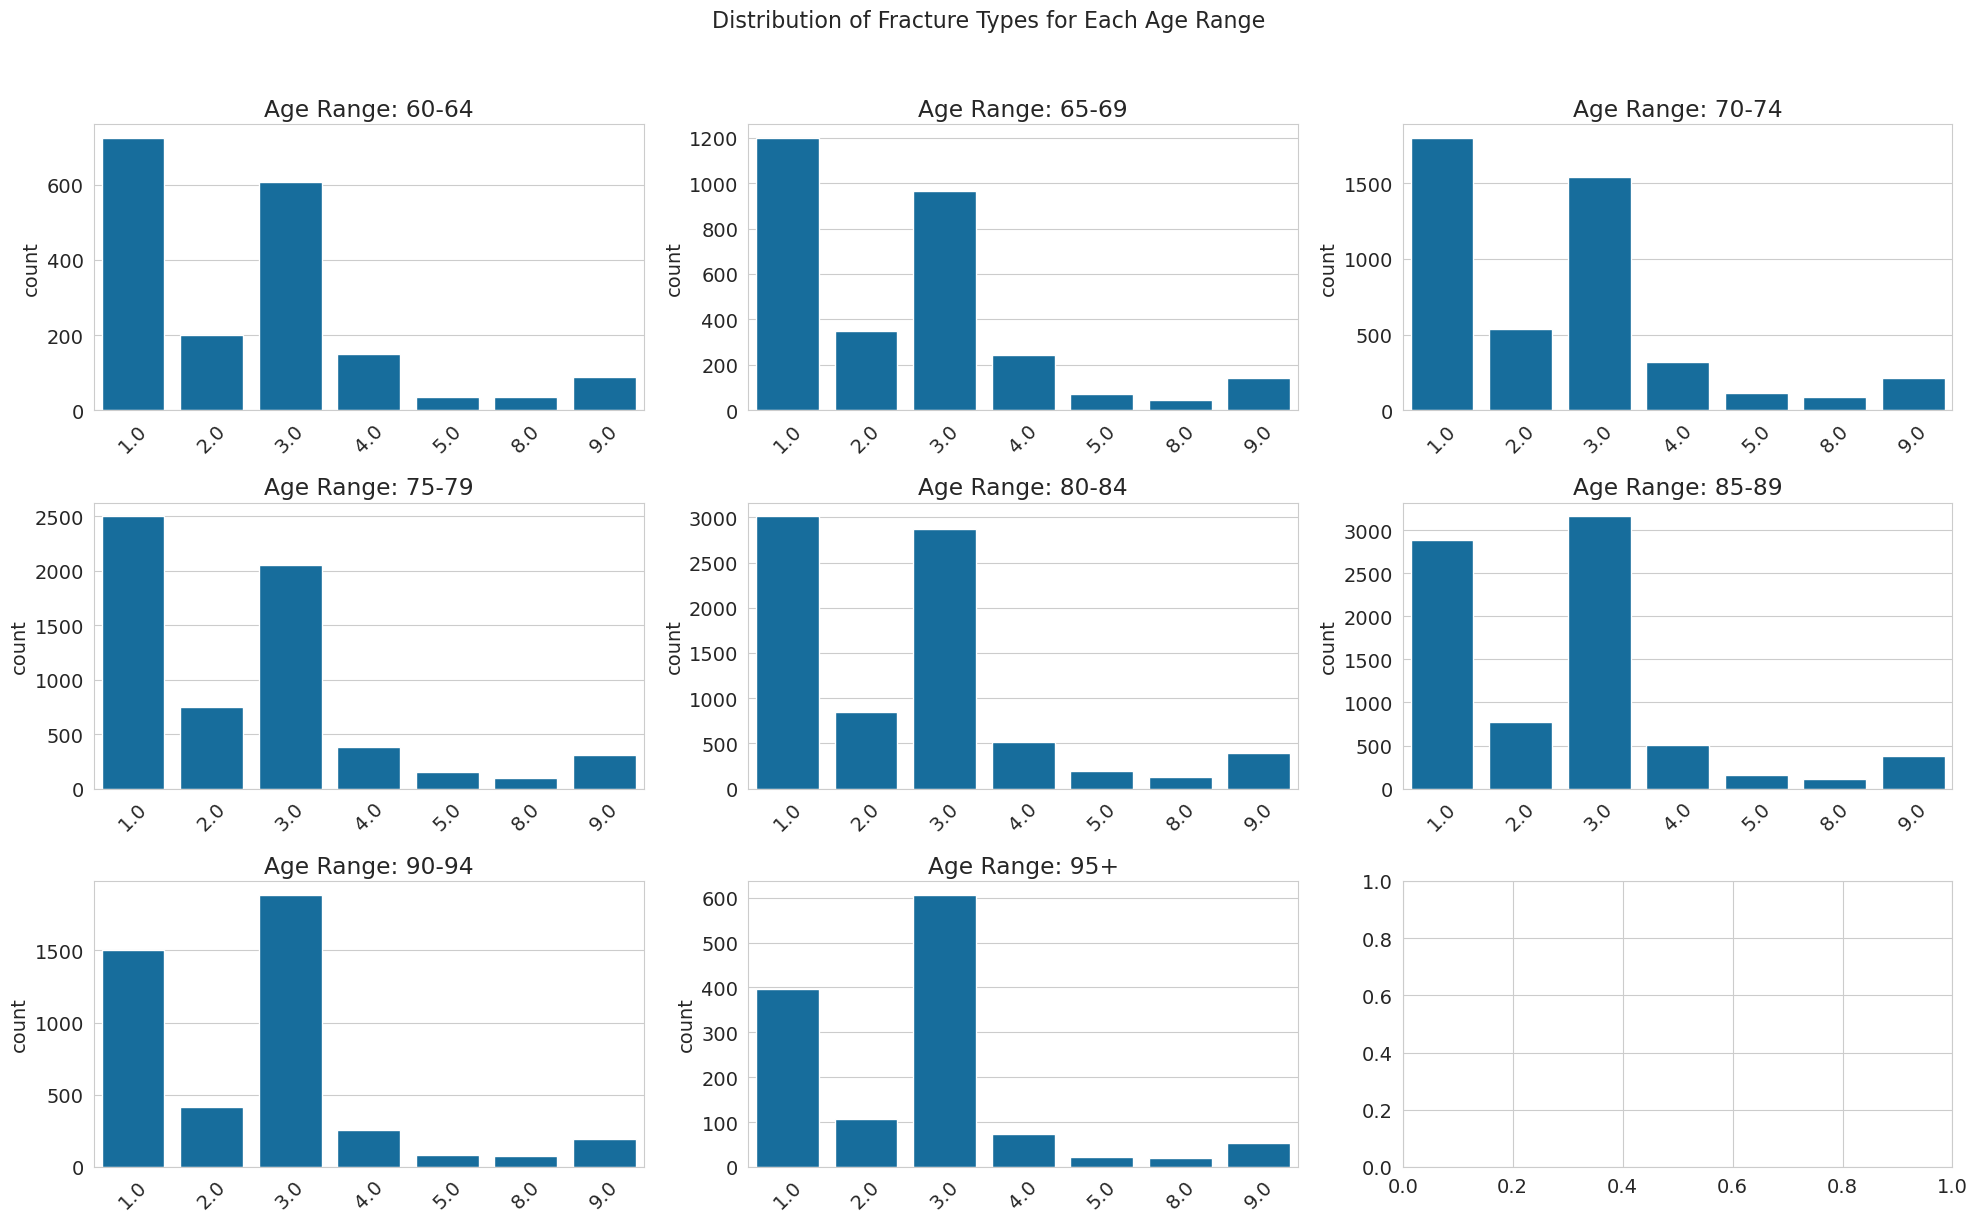


Numerical Summary:
Adm_Fracture_Type   1.0  2.0   3.0  4.0  5.0  8.0  9.0
NOCA_AgeRange                                         
60-64               724  201   607  149   36   36   88
65-69              1199  348   965  244   71   46  144
70-74              1800  537  1544  322  115   85  213
75-79              2498  746  2052  378  154   95  306
80-84              3012  842  2875  513  192  125  395
85-89              2887  773  3162  502  161  109  378
90-94              1503  412  1886  259   83   73  191
95+                 397  106   607   74   22   21   54


In [15]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12))  # Adjust rows/cols based on number of age ranges
axes = axes.ravel()

for idx, age_range in enumerate(sorted(ihfd_red_df['NOCA_AgeRange'].unique())):
    age_data = ihfd_red_df[ihfd_red_df['NOCA_AgeRange'] == age_range]
    sns.countplot(data=age_data, x='Adm_Fracture_Type', ax=axes[idx])
    axes[idx].set_title(f'Age Range: {age_range}')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].set_xlabel('')

plt.suptitle('Distribution of Fracture Types for Each Age Range', y=1.02, size=16)
plt.tight_layout()
plt.show()

summary_df = pd.crosstab(ihfd_red_df['NOCA_AgeRange'], 
                        ihfd_red_df['Adm_Fracture_Type'])
print("\nNumerical Summary:")
print(summary_df)

In [16]:
##trauma type and age
summary_df1 = pd.crosstab(ihfd_red_df['NOCA_AgeRange'], 
                        ihfd_red_df['Adm_Trauma_TYPE'])
print("\nNumerical Summary:")
print("\nTrauma types: 1.High Energy Trauma, 2.Low Energ Trauma, 8.Unknown, 9.Not Documented")
print(summary_df1)


Numerical Summary:

Trauma types: 1.High Energy Trauma, 2.Low Energ Trauma, 8.Unknown, 9.Not Documented
Adm_Trauma_TYPE  1.0   2.0  8.0  9.0
NOCA_AgeRange                       
60-64            171  1619   44    7
65-69            184  2748   74   11
70-74            216  4271  117   12
75-79            192  5873  145   19
80-84            163  7580  186   25
85-89            125  7653  168   26
90-94             55  4238  102   12
95+               13  1228   33    7


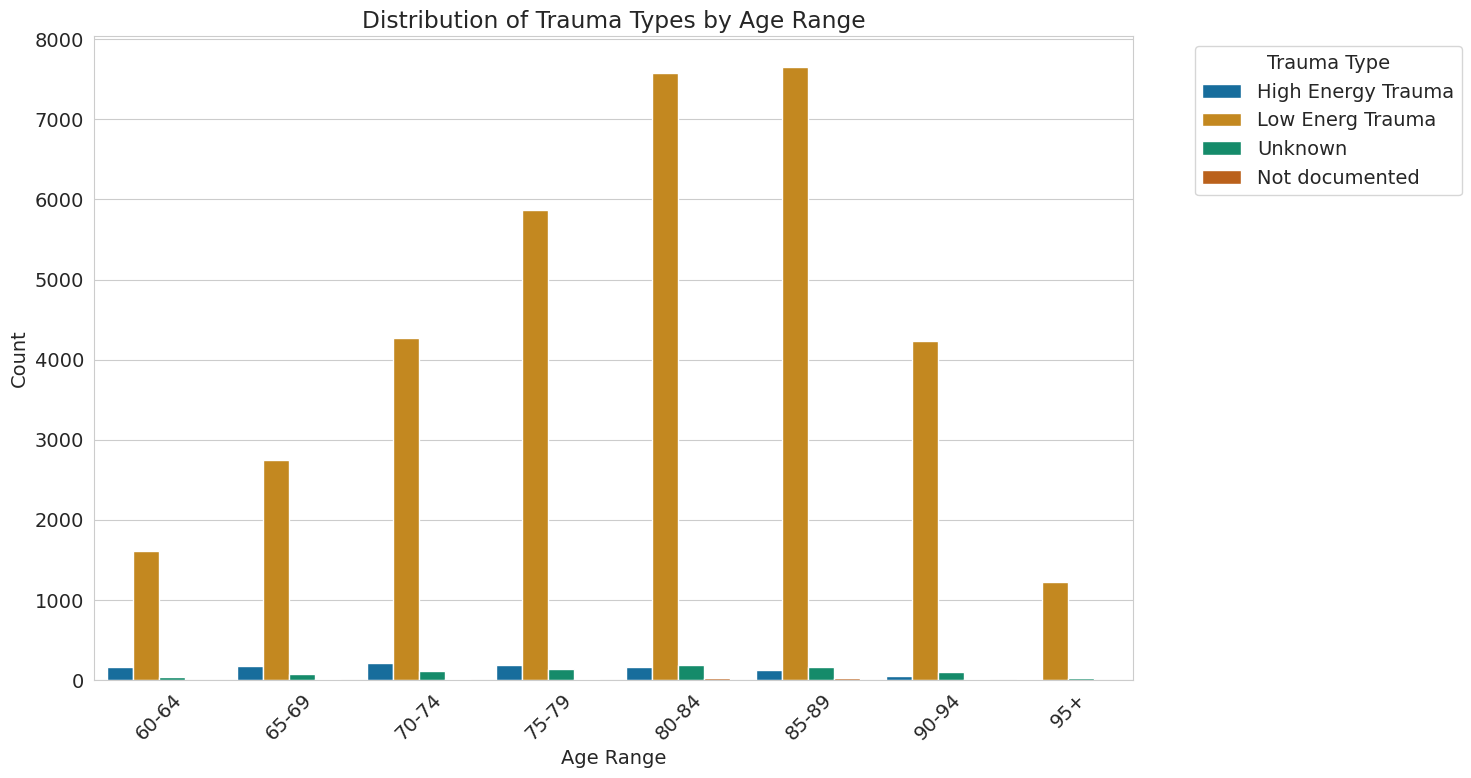


Distribution of Trauma Types:
Trauma_Type_Name
Low Energ Trauma      35210
High Energy Trauma     1119
Unknown                 869
Not documented          119
Name: count, dtype: int64


In [17]:
##plot the trauma type by age group
trauma_type_map = {
    1: 'High Energy Trauma',
    2: 'Low Energ Trauma',
    8: 'Unknown',
    9: 'Not documented'
}

# column with mapped values
ihfd_red_df['Trauma_Type_Name'] = ihfd_red_df['Adm_Trauma_TYPE'].map(trauma_type_map)

# Create the plot with the descriptive names
plt.figure(figsize=(15, 8))
sns.countplot(data=ihfd_red_df, 
              x='NOCA_AgeRange', 
              hue='Trauma_Type_Name',
              hue_order=[trauma_type_map[i] for i in sorted(trauma_type_map.keys())],  
              order=sorted(ihfd_red_df['NOCA_AgeRange'].unique()))

plt.xticks(rotation=45)
plt.title('Distribution of Trauma Types by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.legend(title='Trauma Type', 
          bbox_to_anchor=(1.05, 1), 
          loc='upper left')
plt.tight_layout()
plt.show()

print("\nDistribution of Trauma Types:")
print(ihfd_red_df['Trauma_Type_Name'].value_counts())

In [18]:
##trauma type and fracture type
fracture_type_map = {
    1: 'Intracapsular - displaced',
    2: 'Intracapsular - undisplaced',
    3: 'Intertrochanteric',
    4: 'Subtrochanteric',
    5: 'Periprosthetic',
    8: 'Other',
    9: 'Not documented'
}
summary_df2 = pd.crosstab(ihfd_red_df['Adm_Fracture_Type'], 
                        ihfd_red_df['Adm_Trauma_TYPE'])
print("\nNumerical Summary:")
print("\nTrauma types: 1.High Energy Trauma, 2.Low Energ Trauma, 8.Unknown, 9.Not Documented")
print(fracture_type_map)
print(summary_df2)


Numerical Summary:

Trauma types: 1.High Energy Trauma, 2.Low Energ Trauma, 8.Unknown, 9.Not Documented
{1: 'Intracapsular - displaced', 2: 'Intracapsular - undisplaced', 3: 'Intertrochanteric', 4: 'Subtrochanteric', 5: 'Periprosthetic', 8: 'Other', 9: 'Not documented'}
Adm_Trauma_TYPE    1.0    2.0  8.0  9.0
Adm_Fracture_Type                      
1.0                417  13267  313   23
2.0                 89   3704  159   13
3.0                399  13046  214   39
4.0                103   2285   43   10
5.0                 36    759   34    5
8.0                 23    530   29    8
9.0                 52   1619   77   21


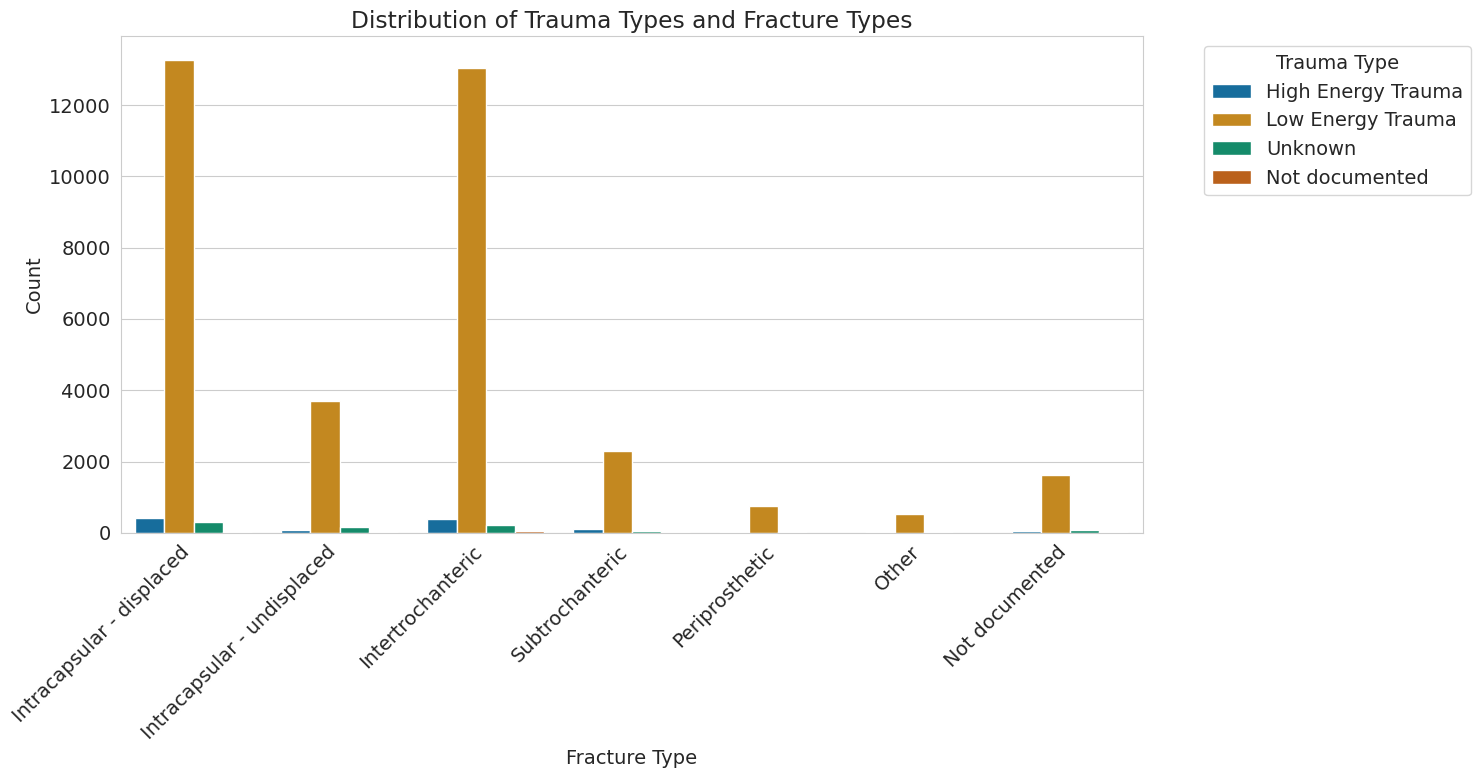


Distribution of Trauma Types:
Trauma_Type_Name
Low Energy Trauma     35210
High Energy Trauma     1119
Unknown                 869
Not documented          119
Name: count, dtype: int64


In [19]:
##plot the trauma type by fracture type 
trauma_type_map = {
    1: 'High Energy Trauma',
    2: 'Low Energy Trauma',
    8: 'Unknown',
    9: 'Not documented'
}

fracture_type_map = {
    1: 'Intracapsular - displaced',
    2: 'Intracapsular - undisplaced',
    3: 'Intertrochanteric',
    4: 'Subtrochanteric',
    5: 'Periprosthetic',
    8: 'Other',
    9: 'Not documented'
}

# Map both columns to their descriptive names
ihfd_red_df['Trauma_Type_Name'] = ihfd_red_df['Adm_Trauma_TYPE'].map(trauma_type_map)
ihfd_red_df['Fracture_Type_Name'] = ihfd_red_df['Adm_Fracture_Type'].map(fracture_type_map)

plt.figure(figsize=(15, 8))
sns.countplot(data=ihfd_red_df, 
              x='Fracture_Type_Name',  
              hue='Trauma_Type_Name',
              hue_order=[trauma_type_map[i] for i in sorted(trauma_type_map.keys())],
              order=[fracture_type_map[i] for i in sorted(fracture_type_map.keys())]) 

plt.xticks(rotation=45, ha='right') 
plt.title('Distribution of Trauma Types and Fracture Types')
plt.xlabel('Fracture Type')
plt.ylabel('Count')
plt.legend(title='Trauma Type',
          bbox_to_anchor=(1.05, 1),
          loc='upper left')
plt.tight_layout()
plt.show()

print("\nDistribution of Trauma Types:")
print(ihfd_red_df['Trauma_Type_Name'].value_counts())

##Define seasons

    Spring: March, April, May
    Summer: June, July, August
    Autumn: September, October, November
    Winter: December, January, February

look at incidents seasonally (put adverse weather data in season and type e.g winter : snow/ice etc)
bring back in date columns and use that to divide up into seasons


####looking at the data the ed admission date in not there for below just to look i used the surgey date and time ( dropped any missing value rows). might have to request ed admission time but reduce to moring , afternoon, evening, like NAS data 

In [24]:
columns_to_drop = [
    'Adm_RE_OP_30_DAYS',
    'Adm_Pre_Frac_Indoor',
    'Adm_PRE_Frac_Outdoor',
    'Adm_Pre_Frac_Number',
    'Adm_Pre_Frac_Shop',
    'Adm_Discharged_To',
    'Adm_Nerve_Block',
    'Adm_Nut_Risk',
    'Adm_Ass_Anp',
    'Adm_AMB_Number_ACU_DIS',
    'Adm_Trauma_DateTime',
    'Adm_Hospital_Fall',
    'Adm_Mobilised_No_Opt',
    'Adm_FRACTURE_Type_Other2',
    'Index'
]

# Drop the columns
ihfd_date = ihfd_df.drop(columns=columns_to_drop)

# Separate numeric and categorical columns
numeric_cols = ihfd_date.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = ihfd_date.select_dtypes(include=['object', 'category']).columns

#Adm_Primary_Surgery_DateTime
ihfd_date['Adm_First_Pres_Hosp_DateTime'] = pd.to_datetime(ihfd_date['Adm_First_Pres_Hosp_DateTime'], format='%d/%m/%Y %H:%M')

# Fill numeric columns with mean
ihfd_date[numeric_cols] = ihfd_date[numeric_cols].fillna(ihfd_date[numeric_cols].median())

# Fill categorical columns with mode (most frequent value)
for col in categorical_cols:
    ihfd_date[col] = ihfd_red_df[col].fillna(ihfd_date[col].mode().iloc[0])

# Verify results
print("\nRemaining NaN values per column:")
print(ihfd_date.isnull().sum())


Remaining NaN values per column:
New Health Regions                 0
NOCA_TraumaPeriodDay               0
Adm_First_Pres_Hosp_DateTime    1091
NOCA_FirstPresPeriodDay            0
NOCA_AgeRange                      0
LOS                                0
Adm_Trauma_TYPE                    0
Adm_Ward_Type                      0
Adm_Fracture_Type                  0
Adm_Pathological                   0
Adm_Fragility                      0
Adm_Pre_OP_Med_Assess              0
Adm_Ger_Acute_Assess               0
Adm_Operation                      0
Adm_Asa_Grade                      0
Adm_Anaesthesia                    0
Adm_Primary_Surgery_DateTime    1735
Adm_Surgery_Delay_Reason           0
Adm_Mobilised                      0
Adm_Pressure_Ulcers                0
Adm_Spec_Falls_Assess              0
Adm_Bone_Protect_Med               0
Adm_Multi_Rehab_Assess             0
dtype: int64


In [25]:
##temp drop date rows that are NAN
ihfd_date_red = ihfd_date.dropna(subset=['Adm_Primary_Surgery_DateTime'])

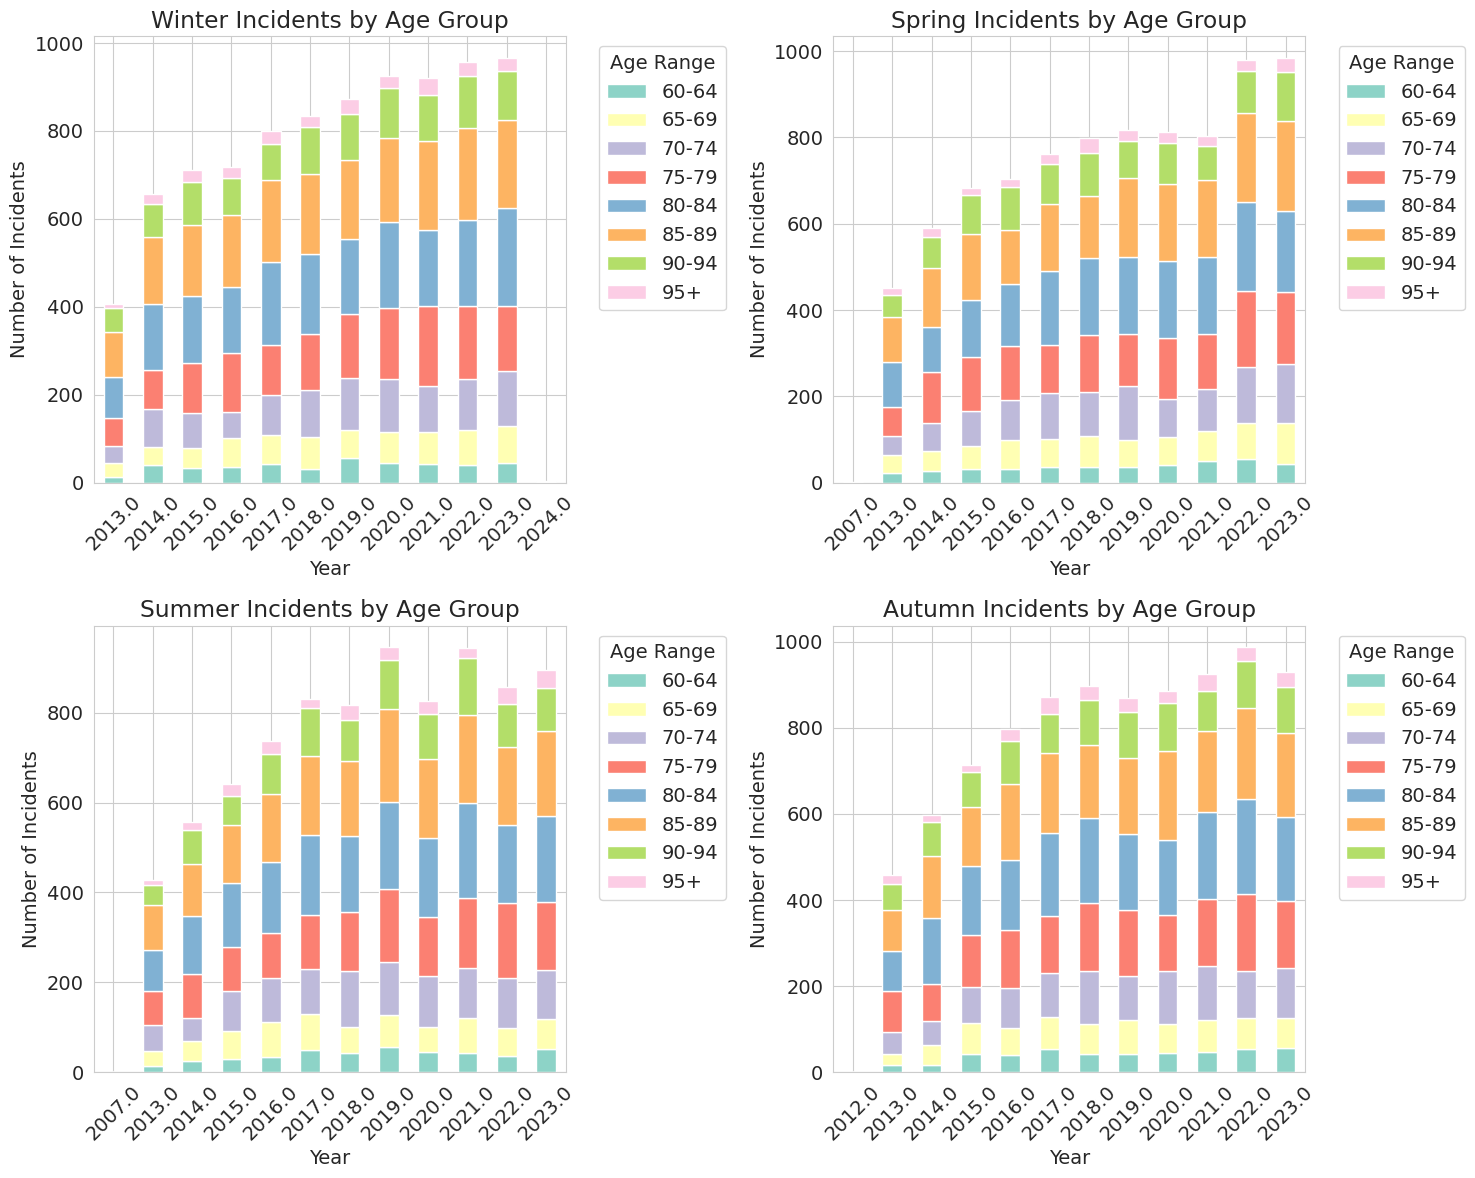


Detailed Summary of Incidents by Season and Age Group:

Total incidents per season and age group:
NOCA_AgeRange  60-64  65-69  70-74  75-79  80-84  85-89  90-94  95+
season                                                             
Autumn           452    716   1088   1500   1928   1887   1048  317
Spring           411    721   1065   1412   1768   1777    968  262
Summer           423    692   1082   1395   1809   1784   1001  289
Winter           424    689   1051   1446   1873   1934   1049  308

Yearly breakdown by season:
season  Autumn  Spring  Summer  Winter
year                                  
2007.0       0       1       1       0
2012.0       1       0       0       0
2013.0     459     452     428     407
2014.0     597     590     557     657
2015.0     713     682     642     712
2016.0     797     703     736     718
2017.0     871     761     830     799
2018.0     898     798     816     834
2019.0     869     817     946     873
2020.0     886     813     825     

In [27]:
df = ihfd_date_red.copy()

# create the new columns
df.loc[:, 'season'] = pd.DatetimeIndex(df['Adm_First_Pres_Hosp_DateTime']).quarter.map({
    1: 'Winter',
    2: 'Spring',
    3: 'Summer',
    4: 'Autumn'
})

df.loc[:, 'year'] = df['Adm_First_Pres_Hosp_DateTime'].dt.year

# Create pivot table for each season
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()


colors = sns.color_palette("Set3", n_colors=len(df['NOCA_AgeRange'].unique()))

for idx, season in enumerate(seasons):
    season_data = df[df['season'] == season]
    
    # Create pivot table - counting occurrences by year
    pivot_data = pd.pivot_table(
        season_data,
        values='Adm_First_Pres_Hosp_DateTime',
        index='year',
        columns='NOCA_AgeRange',
        aggfunc='count',
        fill_value=0
    )
    
    pivot_data.plot(
        kind='bar',
        stacked=True,
        ax=axes[idx],
        color=colors,
        title=f'{season} Incidents by Age Group'
    )
    
    axes[idx].set_xlabel('Year')
    axes[idx].set_ylabel('Number of Incidents')
    axes[idx].legend(title='Age Range', bbox_to_anchor=(1.05, 1))
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# summary statistics
print("\nDetailed Summary of Incidents by Season and Age Group:")
seasonal_summary = df.groupby(['season', 'NOCA_AgeRange']).size().unstack(fill_value=0)
print("\nTotal incidents per season and age group:")
print(seasonal_summary)

print("\nYearly breakdown by season:")
yearly_seasonal = df.groupby(['year', 'season']).size().unstack(fill_value=0)
print(yearly_seasonal)

# Calculate percentages for each age group within seasons
print("\nPercentage distribution of age groups within each season:")
seasonal_percentages = seasonal_summary.div(seasonal_summary.sum(axis=1), axis=0) * 100
print(seasonal_percentages.round(1))

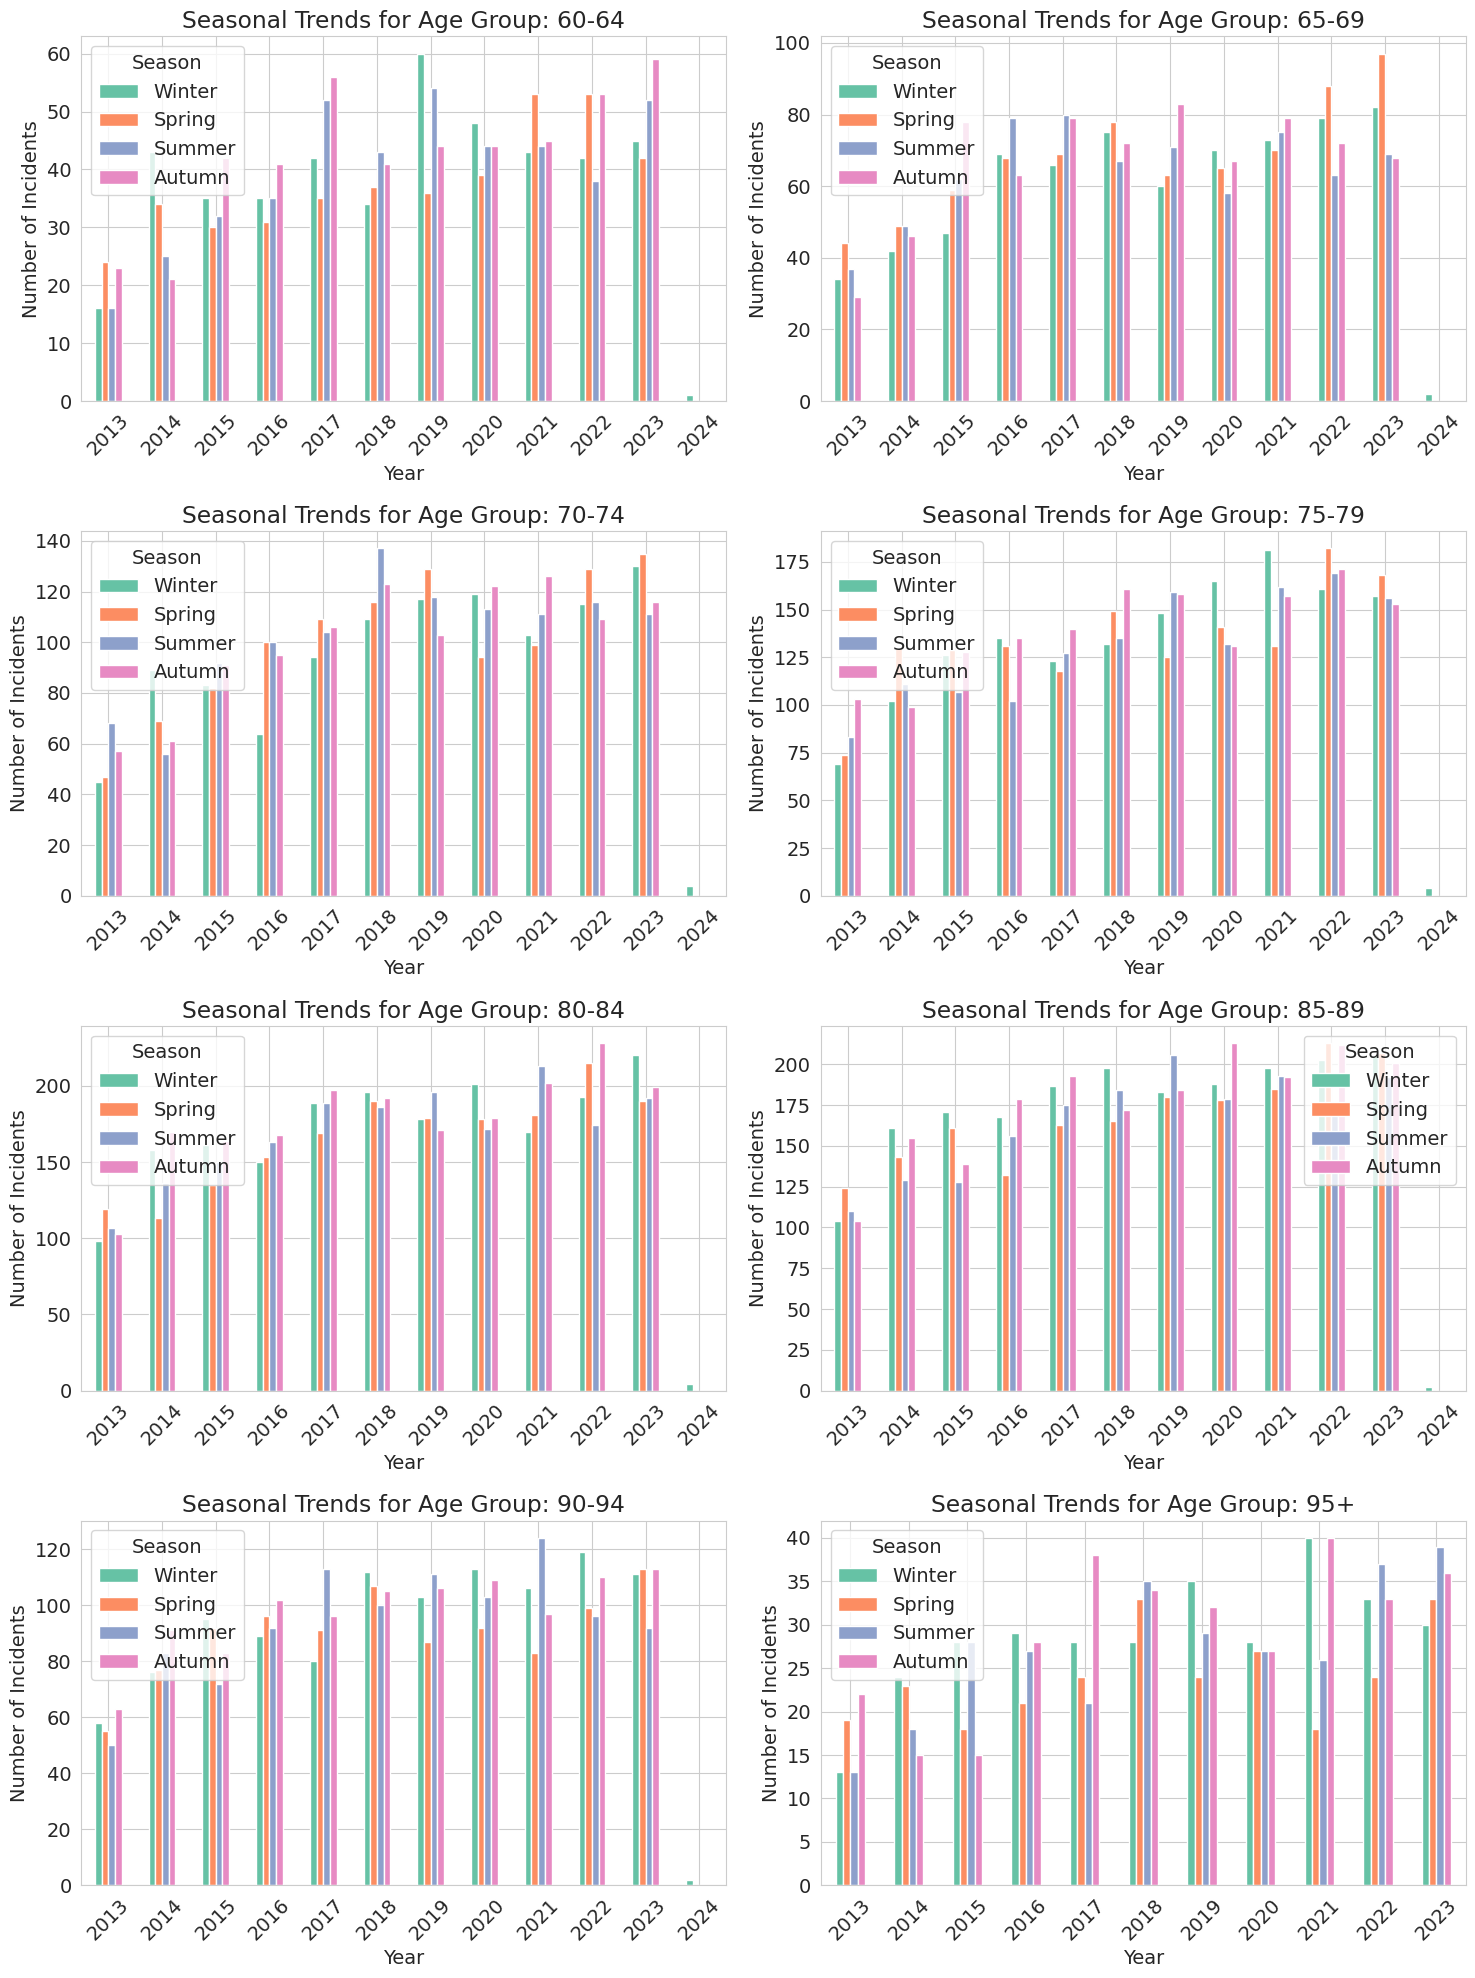


Summary Statistics by Age Group and Season:

Age Group: 60-64

Yearly counts by season:
season  Winter  Spring  Summer  Autumn
year                                  
2013        16      24      16      23
2014        43      34      25      21
2015        35      30      32      42
2016        35      31      35      41
2017        42      35      52      56
2018        34      37      43      41
2019        60      36      54      44
2020        48      39      44      44
2021        43      53      44      45
2022        42      53      38      53
2023        45      42      52      59
2024         1       0       0       0

Percentage distribution across seasons:
season  Winter  Spring  Summer  Autumn
year                                  
2013      20.3    30.4    20.3    29.1
2014      35.0    27.6    20.3    17.1
2015      25.2    21.6    23.0    30.2
2016      24.6    21.8    24.6    28.9
2017      22.7    18.9    28.1    30.3
2018      21.9    23.9    27.7    26.5
2019      30

In [29]:
def plot_age_groups_seasonal(df):
    # Create the season and year columns
    df = df.copy()
    df.loc[:, 'season'] = pd.DatetimeIndex(df['Adm_Primary_Surgery_DateTime']).quarter.map({
        1: 'Winter',
        2: 'Spring',
        3: 'Summer',
        4: 'Autumn'
    })
    df.loc[:, 'year'] = df['Adm_Primary_Surgery_DateTime'].dt.year
    
    # Get age groups and sort them
    age_groups = sorted(df['NOCA_AgeRange'].unique(), 
                       key=lambda x: int(x.split('-')[0]) if '-' in x else int(x[:-1]))  # Handles both "60-64" and "95+" formats
    n_groups = len(age_groups)
    n_cols = 2
    n_rows = (n_groups + 1) // 2  # Ceiling division
    
    # Create figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_groups > 1:
        axes = axes.ravel()
    
    # Color palette for seasons
    colors = sns.color_palette("Set2", n_colors=4)
    
    # Plot for each age group
    for idx, age_group in enumerate(age_groups):
        age_group_data = df[df['NOCA_AgeRange'] == age_group]
        
        # Create pivot table for the age group
        pivot_data = pd.pivot_table(
            age_group_data,
            values='Adm_Primary_Surgery_DateTime',
            index='year',
            columns='season',
            aggfunc='count',
            fill_value=0
        )
        
        # Reorder seasons
        season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
        pivot_data = pivot_data[season_order]
        
        # Create the plot
        pivot_data.plot(
            kind='bar',
            ax=axes[idx] if n_groups > 1 else axes,
            color=colors,
            title=f'Seasonal Trends for Age Group: {age_group}'
        )
        
        current_ax = axes[idx] if n_groups > 1 else axes
        current_ax.set_xlabel('Year')
        current_ax.set_ylabel('Number of Incidents')
        current_ax.legend(title='Season')
        current_ax.tick_params(axis='x', rotation=45)
    
    # Remove any empty subplots
    if n_groups > 1:
        for idx in range(n_groups, len(axes)):
            fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()
    
    # summary of statistics
    print("\nSummary Statistics by Age Group and Season:")
    for age_group in age_groups:  
        print(f"\nAge Group: {age_group}")
        age_data = df[df['NOCA_AgeRange'] == age_group]
        seasonal_summary = pd.pivot_table(
            age_data,
            values='Adm_Primary_Surgery_DateTime',
            index='year',
            columns='season',
            aggfunc='count',
            fill_value=0
        )[season_order]
        print("\nYearly counts by season:")
        print(seasonal_summary)
        
        # rint percentages
        print("\nPercentage distribution across seasons:")
        season_percentages = (seasonal_summary.div(seasonal_summary.sum(axis=1), axis=0) * 100).round(1)
        print(season_percentages)


plot_age_groups_seasonal(ihfd_date_red)

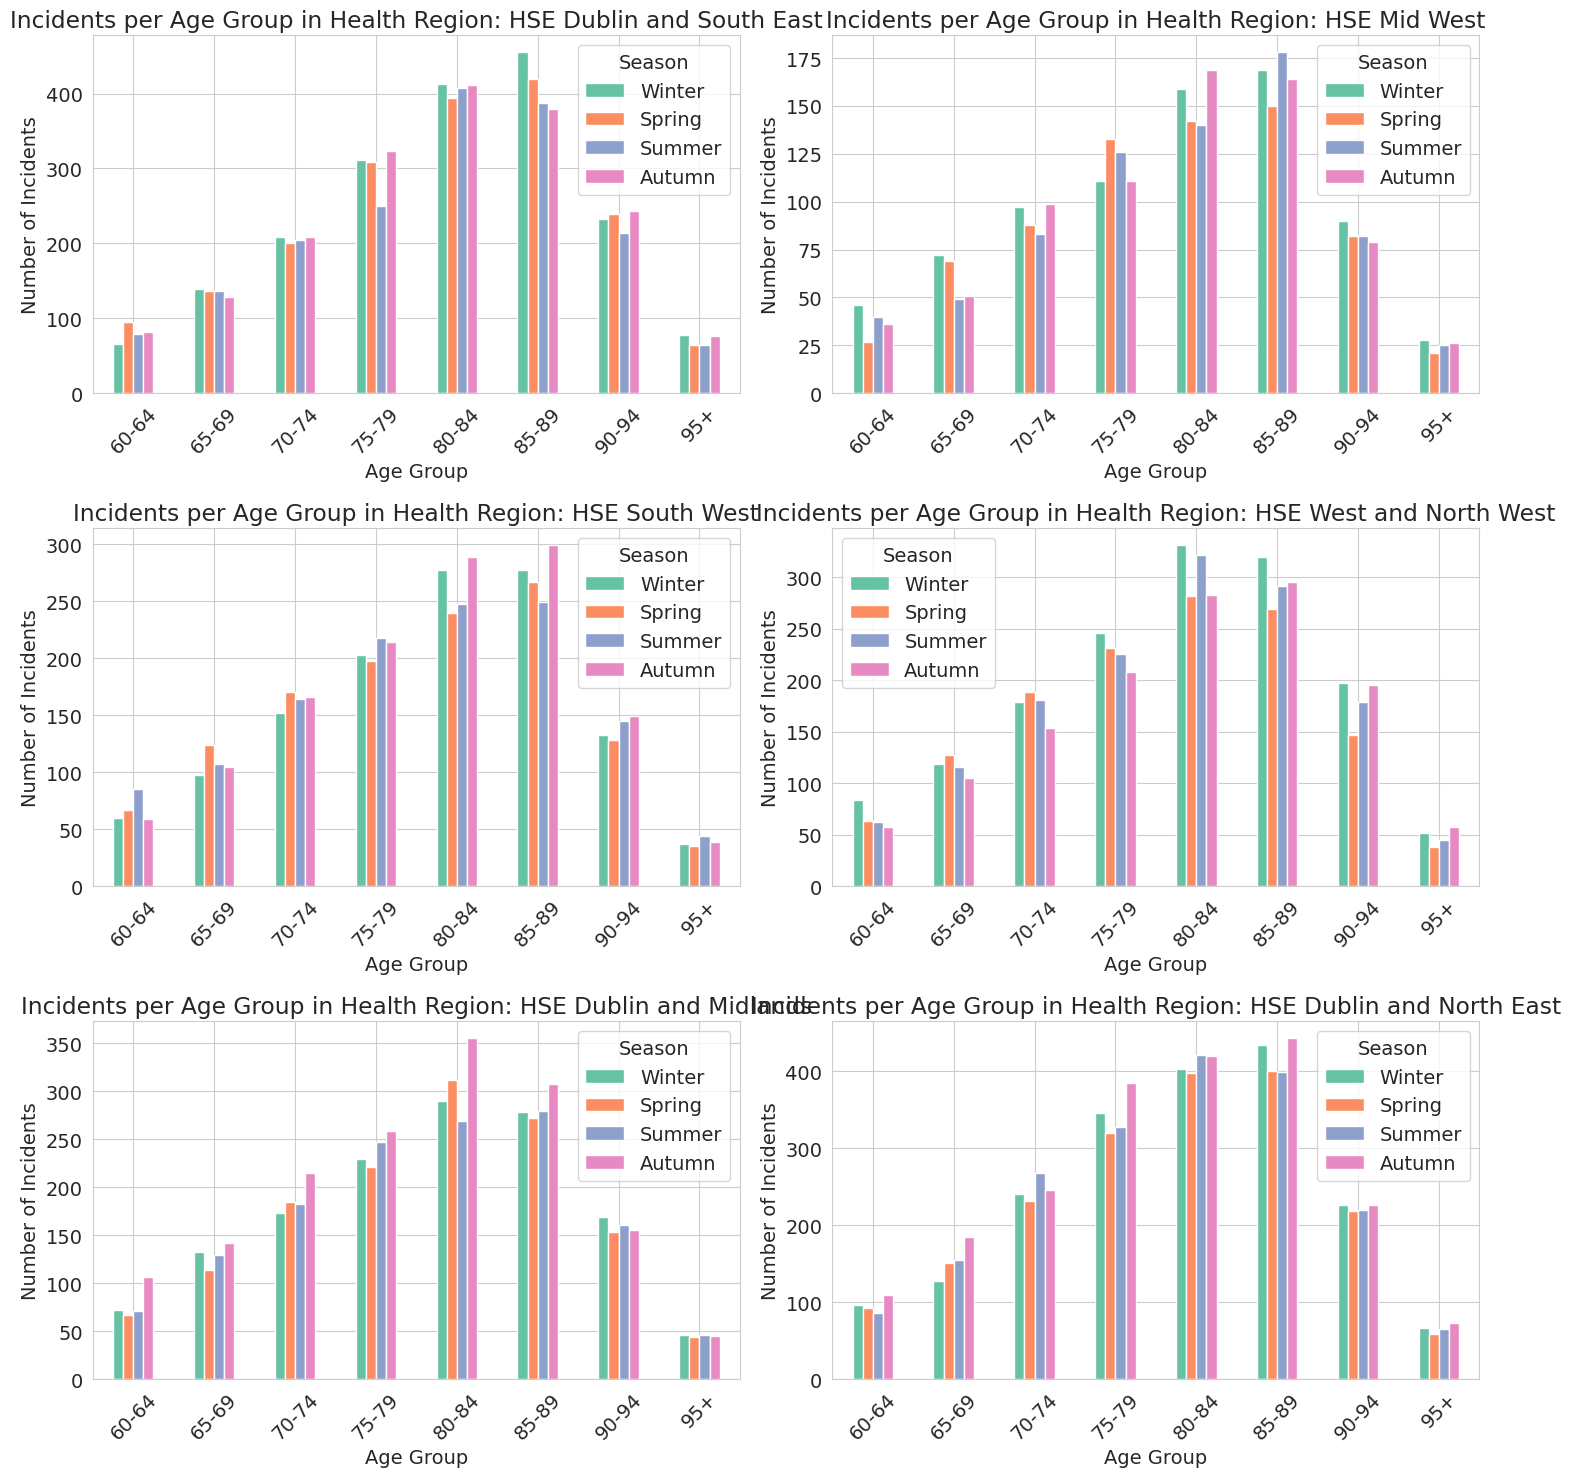


Summary Statistics by Health Region and Age Group:

Health Region: HSE Dublin and South East

Counts by age group and season:
season         Winter  Spring  Summer  Autumn
NOCA_AgeRange                                
60-64              66      95      79      82
65-69             139     136     136     128
70-74             209     201     204     208
75-79             311     309     250     323
80-84             413     394     408     412
85-89             455     419     387     379
90-94             233     239     214     243
95+                78      65      64      76

Percentage distribution across seasons:
season         Winter  Spring  Summer  Autumn
NOCA_AgeRange                                
60-64            20.5    29.5    24.5    25.5
65-69            25.8    25.2    25.2    23.7
70-74            25.4    24.5    24.8    25.3
75-79            26.1    25.9    21.0    27.1
80-84            25.4    24.2    25.1    25.3
85-89            27.7    25.5    23.6    23.1
90-9

In [30]:
def plot_age_groups_health_regions(df):
    # Create the season and year columns
    df = df.copy()
    df.loc[:, 'season'] = pd.DatetimeIndex(df['Adm_First_Pres_Hosp_DateTime']).quarter.map({
        1: 'Winter',
        2: 'Spring',
        3: 'Summer',
        4: 'Autumn'
    })
    df.loc[:, 'year'] = df['Adm_First_Pres_Hosp_DateTime'].dt.year
    
    # Get unique health regions and age groups
    health_regions = df['New Health Regions'].unique()
    age_groups = sorted(df['NOCA_AgeRange'].unique(), 
                       key=lambda x: int(x.split('-')[0]) if '-' in x else int(x[:-1]))  # Handles both "60-64" and "95+" formats
    
    # Create figure
    n_regions = len(health_regions)
    n_cols = 2
    n_rows = (n_regions + 1) // 2  # Ceiling division
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_regions > 1:
        axes = axes.ravel()
    
    # Color palette for seasons
    colors = sns.color_palette("Set2", n_colors=4)
    
    # Plot for each health region
    for idx, region in enumerate(health_regions):
        region_data = df[df['New Health Regions'] == region]
        
        # Create pivot table for the health region
        pivot_data = pd.pivot_table(
            region_data,
            values='Adm_First_Pres_Hosp_DateTime',
            index='NOCA_AgeRange',
            columns='season',
            aggfunc='count',
            fill_value=0
        )
        
        # Reorder seasons
        season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
        pivot_data = pivot_data[season_order]
        
        # Create the plot
        pivot_data.plot(
            kind='bar',
            ax=axes[idx] if n_regions > 1 else axes,
            color=colors,
            title=f'Incidents per Age Group in Health Region: {region}'
        )
        
        current_ax = axes[idx] if n_regions > 1 else axes
        current_ax.set_xlabel('Age Group')
        current_ax.set_ylabel('Number of Incidents')
        current_ax.legend(title='Season')
        current_ax.tick_params(axis='x', rotation=45)
    
    # Remove any empty subplots
    if n_regions > 1:
        for idx in range(n_regions, len(axes)):
            fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()
    
    # Summary of statistics
    print("\nSummary Statistics by Health Region and Age Group:")
    for region in health_regions:  
        print(f"\nHealth Region: {region}")
        region_data = df[df['New Health Regions'] == region]
        age_group_summary = pd.pivot_table(
            region_data,
            values='Adm_First_Pres_Hosp_DateTime',
            index='NOCA_AgeRange',
            columns='season',
            aggfunc='count',
            fill_value=0
        )[season_order]
        print("\nCounts by age group and season:")
        print(age_group_summary)
        
        # Print percentages
        print("\nPercentage distribution across seasons:")
        season_percentages = (age_group_summary.div(age_group_summary.sum(axis=1), axis=0) * 100).round(1)
        print(season_percentages)

# Call the updated function
plot_age_groups_health_regions(ihfd_date_red)


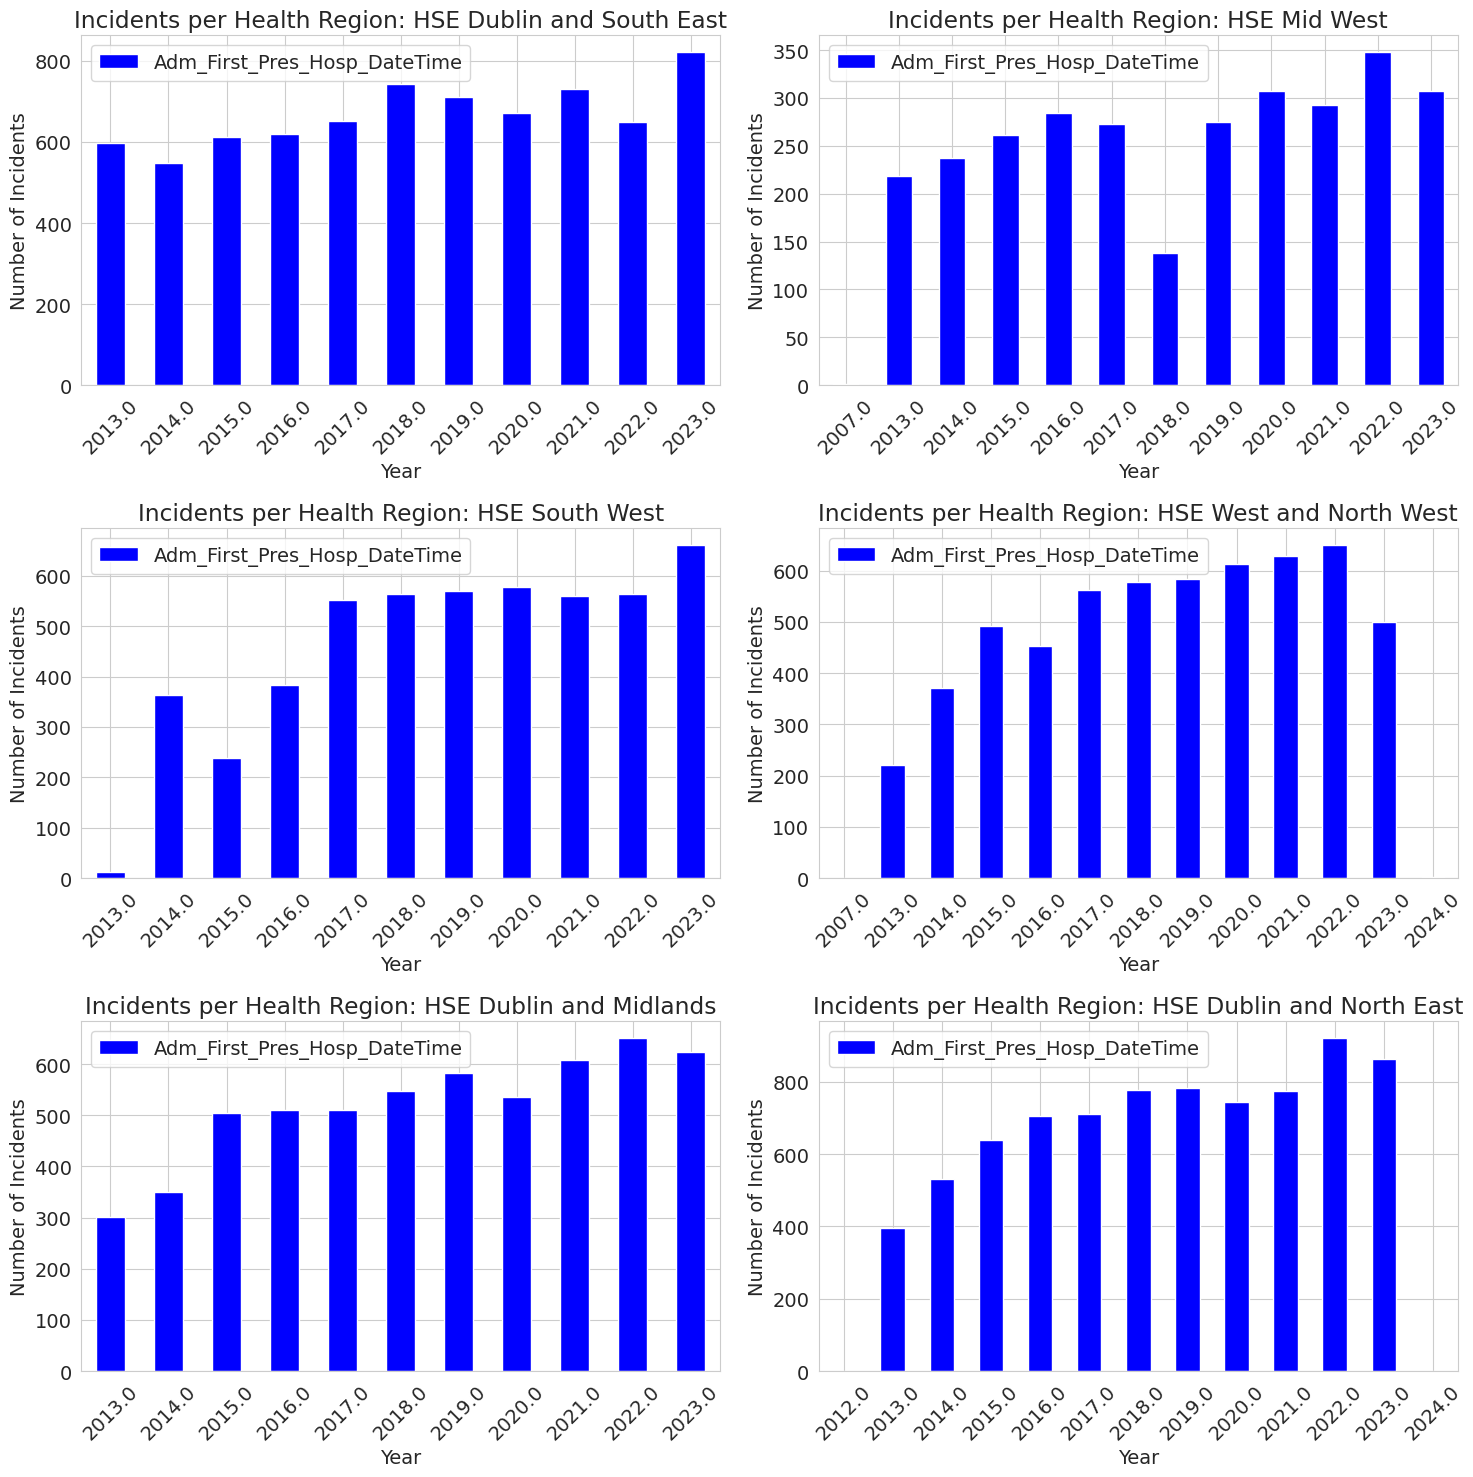


Summary Statistics by Health Region and Year:

Health Region: HSE Dublin and South East

Counts by year:
        Adm_First_Pres_Hosp_DateTime
year                                
2013.0                           597
2014.0                           548
2015.0                           613
2016.0                           619
2017.0                           652
2018.0                           743
2019.0                           710
2020.0                           672
2021.0                           730
2022.0                           649
2023.0                           822

Health Region: HSE Mid West

Counts by year:
        Adm_First_Pres_Hosp_DateTime
year                                
2007.0                             1
2013.0                           218
2014.0                           237
2015.0                           261
2016.0                           284
2017.0                           273
2018.0                           138
2019.0                           2

In [32]:
def plot_yearly_cases_per_region(df):
    # Create the season and year columns
    df = df.copy()
    df.loc[:, 'year'] = df['Adm_First_Pres_Hosp_DateTime'].dt.year
    
    # Get unique health regions
    health_regions = df['New Health Regions'].unique()
    
    # Create figure
    n_regions = len(health_regions)
    n_cols = 2
    n_rows = (n_regions + 1) // 2  # Ceiling division
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_regions > 1:
        axes = axes.ravel()
    
    # Plot for each health region
    for idx, region in enumerate(health_regions):
        region_data = df[df['New Health Regions'] == region]
        
        # Create pivot table for the health region
        pivot_data = pd.pivot_table(
            region_data,
            values='Adm_First_Pres_Hosp_DateTime',
            index='year',
            aggfunc='count',
            fill_value=0
        )
        
        # Create the plot
        pivot_data.plot(
            kind='bar',
            ax=axes[idx] if n_regions > 1 else axes,
            color='b',
            title=f'Incidents per Health Region: {region}'
        )
        
        current_ax = axes[idx] if n_regions > 1 else axes
        current_ax.set_xlabel('Year')
        current_ax.set_ylabel('Number of Incidents')
        current_ax.tick_params(axis='x', rotation=45)
    
    # Remove any empty subplots
    if n_regions > 1:
        for idx in range(n_regions, len(axes)):
            fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()
    
    # Summary of statistics
    print("\nSummary Statistics by Health Region and Year:")
    for region in health_regions:  
        print(f"\nHealth Region: {region}")
        region_data = df[df['New Health Regions'] == region]
        year_summary = pd.pivot_table(
            region_data,
            values='Adm_First_Pres_Hosp_DateTime',
            index='year',
            aggfunc='count',
            fill_value=0
        )
        print("\nCounts by year:")
        print(year_summary)

# Call the updated function
plot_yearly_cases_per_region(ihfd_date_red)


In [34]:
from sklearn import manifold 
from sklearn import cluster  
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn import set_config
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OrdinalEncoder, QuantileTransformer, LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer



In [35]:
ihfd_norm_v1 = ihfd_date_red.copy()

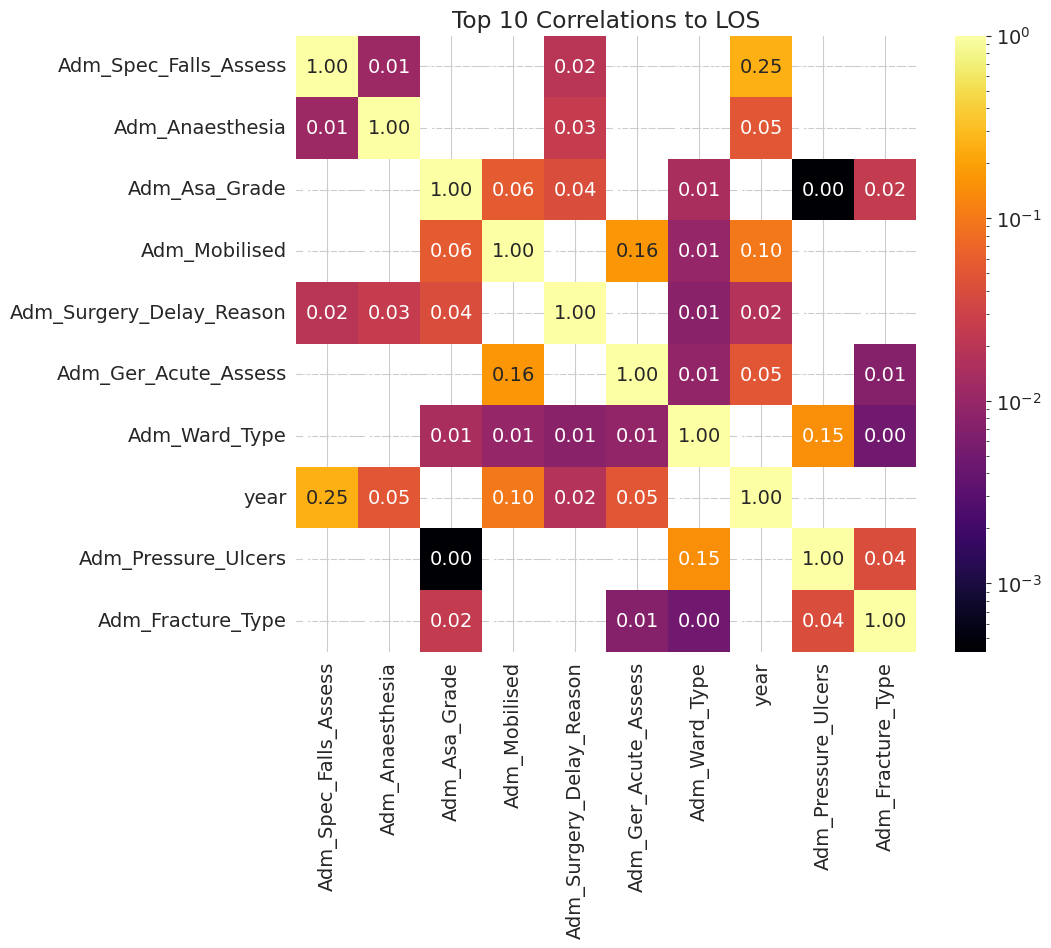

In [48]:


# Assuming df is your dataframe and 'target_variable' is the specific variable you want correlations for
target_variable = 'LOS'

# Step 1: Filter the dataframe to only include numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Step 2: Calculate the correlation matrix
correlation_matrix = numeric_df.corr(method='pearson')

# Step 3: Extract correlations for the target variable and sort
target_correlations = correlation_matrix[target_variable].abs().sort_values(ascending=False)

# Step 4: Select the top 10 correlations (excluding the target variable itself)
top_10_variables = target_correlations[1:11].index  # Exclude the target variable

# Step 5: Filter the correlation matrix to only include the top 10 variables
filtered_corr_matrix = correlation_matrix.loc[top_10_variables, top_10_variables]

# Step 6: Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='inferno', fmt='.2f', norm=LogNorm())
plt.title(f'Top 10 Correlations to {target_variable}')
plt.show()


In [37]:
num_cols = ihfd_norm_v1.select_dtypes(include=['int64', 'float64']).columns
cat_cols = ihfd_norm_v1.select_dtypes(include=['object', 'category']).columns

In [ ]:
## Numerical i use iterativeimputer to impute missing values and robust scaler to scale and handle outliers 
numerical_miss = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=200, random_state=42)),
    ('scale', RobustScaler())
])
## this handle numerical without missing values
numerical = Pipeline(steps=[
    ('scale', RobustScaler())
])

## Catergorical i use SimpleImputer to imputer meassing values 
categorical_miss = Pipeline(steps=[
    ('impute', SimpleImputer(strategy="constant", fill_value="unknown")),
    ('onehot', OneHotEncoder(sparse_output=False))  
])
## Catergorical i use SimpleImputer to imputer meassing values 
categorical = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  
])

ordinal = Pipeline(steps=[
    ('ordimpute', SimpleImputer(strategy="constant", fill_value="missing")),
    ('onehot', OneHotEncoder(sparse_output=False)),
    ('ord',KNNImputer(n_neighbors=4, weights="uniform"))
])

categorical_binary= Pipeline(
   [("onehot", FunctionTransformer(one_hot_encode_binary_features))
])

cyclical_month = Pipeline(
    [('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore')),
     ("cyclic", CyclicalFeatures(drop_original=True))
])

cyclical_day = Pipeline(
     [("cyclic", CyclicalFeatures(drop_original=True))
])


# Column transformer
preprocess_pipeline = ColumnTransformer(transformers=[
    ('num_miss', numerical_miss, numerical_cols_missing),
    ('num', numerical, numerical_cols),
    ('cat_miss', categorical_miss, categorical_cols_missing),
    ('cat', categorical, categorical_cols),
    ('bin', categorical_binary, binary_cols),
    ('ord', ordinal, ord_cols),
    ('cycd', cyclical_day, cyclical_days),
    ('cycm', cyclical_month, cyclical_months)    
],
    remainder="passthrough")

preprocess_pipeline